In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import pandas_profiling
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
import statsmodels.formula.api as smf

In [2]:
CreditConsumptionData=pd.read_excel(r"C:\Users\amans\OneDrive\Desktop\DL\case study 1\CreditConsumptionData.xlsx")

In [3]:
CreditConsumptionData.shape

(20000, 2)

In [4]:
CreditConsumptionData.isnull().sum()

ID            0
cc_cons    5000
dtype: int64

In [5]:
CreditConsumptionData

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


# Data sets overview checking null values,shape and info

In [6]:
CustomerBehaviorData=pd.read_excel("CustomerBehaviorData.xlsx")

In [7]:
CustomerBehaviorData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [8]:
CustomerBehaviorData

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [9]:
CustomerBehaviorData.isnull().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [10]:
CustomerBehaviorData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [11]:
CustomerDemographics=pd.read_excel("CustomerDemographics.xlsx")

In [12]:
CustomerDemographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [13]:
CustomerDemographics

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [14]:
CustomerDemographics.isnull().sum()

ID                              0
account_type                    1
gender                          1
age                             0
Income                          1
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     1
NetBanking_Flag                 0
Avg_days_between_transaction    3
dtype: int64

# Merging data sets 

In [15]:
#Merging "CustomerBehaviorData" & "CustomerDemographics" data on common columnd ID.

df1=pd.merge(CustomerBehaviorData,CustomerDemographics,on="ID")

In [16]:
#Merging (df1=CustomerBehaviorData & CustomerDemographics) and "CreditConsumptionData" on common columnd ID.

cust_credit_info=pd.merge(df1,CreditConsumptionData,on="ID")

In [17]:
#Checking dublicates
cust_credit_info.duplicated().sum()

0

In [18]:
# Since we have 5000 null of cc_cons for prediction (Average Credit Card Spend in next three months) 
#we take out that data from the dataset for prediction.

Prediction_data=cust_credit_info[cust_credit_info["cc_cons"].isnull()]
Prediction_data

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
15000,17591,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,...,current,M,37,MEDIUM,11.9,4,575.0,1,16.0,NaN
15001,13541,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,...,current,M,33,MEDIUM,7.8,6,394.0,0,19.0,NaN
15002,13431,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,...,current,M,53,LOW,33.0,10,324.0,1,15.0,NaN
15003,8687,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,...,current,M,33,MEDIUM,7.8,5,370.0,1,7.0,NaN
15004,14727,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,...,current,M,62,LOW,12.6,9,505.0,1,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,current,M,35,MEDIUM,13.5,1,523.0,0,7.0,NaN
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,current,M,53,MEDIUM,9.9,7,723.0,1,2.0,NaN
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,current,M,62,HIGH,37.8,8,863.0,1,16.0,NaN
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,current,M,34,MEDIUM,12.6,4,882.0,0,13.0,NaN


In [19]:
# Data which we use for training the model & 
# Droping null values since null values is very low(null value percentage) as compare to the whole dataset.
cust_credit_info=cust_credit_info[~cust_credit_info["cc_cons"].isnull()]


In [20]:
# '''As we have to predict credit consumption means credit spend by the customer that is our target variable, 
#that will be a numeric value so that this is a regression problem.

In [21]:
# cheking the datatype details and null values for the dataset
cust_credit_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   cc_cons_apr                   15000 non-null  float64
 2   dc_cons_apr                   15000 non-null  float64
 3   cc_cons_may                   15000 non-null  float64
 4   dc_cons_may                   15000 non-null  float64
 5   cc_cons_jun                   15000 non-null  float64
 6   dc_cons_jun                   15000 non-null  float64
 7   cc_count_apr                  14999 non-null  float64
 8   cc_count_may                  15000 non-null  int64  
 9   cc_count_jun                  15000 non-null  int64  
 10  dc_count_apr                  15000 non-null  int64  
 11  dc_count_may                  15000 non-null  int64  
 12  dc_count_jun                  15000 non-null  int64  
 13  c

In [22]:
cust_credit_info.isna().sum()

ID                              0
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    1
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            1
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3                    2
investment_4                    0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 1
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_m

In [23]:
# Find Categorical variable in Data frame and spliting the data with categorical and numeriacal data.
cust_credit_info_conti_vars = cust_credit_info.loc[:, (cust_credit_info.dtypes == 'float64') | (cust_credit_info.dtypes == 'int64')]
cust_credit_info_cat_vars = cust_credit_info.loc[:, (cust_credit_info.dtypes == 'object')]
cust_credit_info_conti_vars

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,18,19947.00,3448.84,30,7.0,5,956.0,1,20.0,13434.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,49,20585.00,3812.69,37,10.2,8,966.0,1,5.0,449.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,49,13950.00,9432.90,33,3.9,3,505.0,1,15.0,11968.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,37,37018.00,144.61,63,25.8,6,631.0,0,15.0,32029.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,15,24274.00,1887.89,33,6.5,7,698.0,0,9.0,16394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,...,8,82851.00,78966.76,53,13.2,9,653.0,1,20.0,4263.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,...,18,118110.47,4762.10,44,2.4,9,535.0,1,2.0,11019.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,...,73,49545.00,2877.33,37,3.4,9,464.0,1,8.0,404227.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,...,80,16130.00,13006.84,220,40.0,10,536.0,1,3.0,28813.0


In [24]:
# Since our data contains categorical values, for beter calculation for model tarining
# We will encode the categorical values into numerical one by using OneHotEncoder,OrdinalEncoder. 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

transformer=ColumnTransformer(transformers=[
    ("tnf1",OneHotEncoder(sparse=False,drop="first"),["gender","account_type","loan_enq"]),
    ("tnf2",OrdinalEncoder(categories=[["HIGH","MEDIUM","LOW"]]),["Income"]),
],remainder="passthrough")

T=transformer.fit_transform(cust_credit_info_cat_vars)
cust_credit_info_cat_vars=pd.DataFrame(T,columns=transformer.get_feature_names_out())


In [25]:
cust_credit_info_cat_vars

,tnf1__gender_M,tnf1__account_type_saving,tnf1__loan_enq_nan,tnf2__Income
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,2.0
2,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,2.0
4,1.0,1.0,0.0,1.0
...,...,...,...,...
14995,0.0,0.0,0.0,2.0
14996,1.0,0.0,0.0,1.0
14997,1.0,0.0,0.0,1.0
14998,1.0,0.0,0.0,1.0


In [26]:
cust_credit_info_cat_vars.columns = cust_credit_info_cat_vars.columns.str.replace("tnf1__", "")
cust_credit_info_cat_vars.columns = cust_credit_info_cat_vars.columns.str.replace("tnf2__", "")

In [27]:
cust_credit_info_conti_vars

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,18,19947.00,3448.84,30,7.0,5,956.0,1,20.0,13434.0
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,49,20585.00,3812.69,37,10.2,8,966.0,1,5.0,449.0
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,49,13950.00,9432.90,33,3.9,3,505.0,1,15.0,11968.0
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,37,37018.00,144.61,63,25.8,6,631.0,0,15.0,32029.0
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,15,24274.00,1887.89,33,6.5,7,698.0,0,9.0,16394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,10443.76,1218.85,7252.24,3873.00,6633.00,10107.00,3.0,36,3,...,8,82851.00,78966.76,53,13.2,9,653.0,1,20.0,4263.0
14996,10376,29890.33,6308.00,16025.50,7610.00,2213.08,841.60,1.0,34,4,...,18,118110.47,4762.10,44,2.4,9,535.0,1,2.0,11019.0
14997,2181,4148.98,948.74,19360.26,494.00,44363.91,1801.77,57.0,23,61,...,73,49545.00,2877.33,37,3.4,9,464.0,1,8.0,404227.0
14998,18417,115574.00,7191.05,44341.13,34817.20,20679.00,1010.00,7.0,128,44,...,80,16130.00,13006.84,220,40.0,10,536.0,1,3.0,28813.0


### Finding Correlation [-1, 1] 0 = No correlation 1= Very High +ve Corr -1 Very High -ve Corr
If Corr < -0.7 or Corr>0.7 We can remove 1 of 2 features

In [28]:
# lets find out the correlation between the data columns 
cust_credit_info_conti_vars.corr()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
ID,1.000000,0.006757,-0.005333,0.016962,0.008824,0.008500,0.009802,0.004193,0.002149,-0.009104,...,-0.011713,0.002199,0.002639,-0.001936,-0.007564,0.000827,-0.003070,-0.001593,-0.002351,0.004666
cc_cons_apr,0.006757,1.000000,0.000455,0.004885,0.001654,0.006478,-0.004027,-0.003294,0.011572,0.008531,...,0.012826,-0.004225,0.001389,0.007961,0.005367,-0.006918,0.006899,0.003291,0.009393,0.006155
dc_cons_apr,-0.005333,0.000455,1.000000,0.004183,-0.008169,0.003859,-0.006139,0.004361,-0.000574,0.005936,...,-0.002386,-0.017862,0.000660,0.017420,0.015731,-0.007355,-0.010570,-0.006536,0.009889,-0.000126
cc_cons_may,0.016962,0.004885,0.004183,1.000000,-0.009334,-0.010209,-0.000025,-0.010125,-0.001647,-0.011664,...,-0.014621,-0.004125,0.000929,-0.001586,-0.004784,0.013001,-0.010820,-0.002122,0.013300,0.021822
dc_cons_may,0.008824,0.001654,-0.008169,-0.009334,1.000000,-0.005497,0.003476,0.003110,0.005374,-0.003441,...,0.004718,0.001849,-0.003983,-0.004452,-0.001140,0.000488,0.006506,0.006908,0.003486,-0.000642
cc_cons_jun,0.008500,0.006478,0.003859,-0.010209,-0.005497,1.000000,0.001546,0.002901,0.002671,0.010075,...,0.013915,0.002769,-0.002004,-0.013386,-0.015891,-0.012819,-0.008059,-0.002462,0.001734,-0.000900
dc_cons_jun,0.009802,-0.004027,-0.006139,-0.000025,0.003476,0.001546,1.000000,-0.008337,0.003352,0.004609,...,-0.005775,-0.005243,0.002411,0.008623,0.015979,-0.005133,0.011785,0.000837,-0.005179,0.002863
cc_count_apr,0.004193,-0.003294,0.004361,-0.010125,0.003110,0.002901,-0.008337,1.000000,-0.001853,0.009109,...,-0.019601,-0.014190,-0.006130,0.004957,0.009155,0.012032,-0.003762,0.012866,-0.015964,-0.009765
cc_count_may,0.002149,0.011572,-0.000574,-0.001647,0.005374,0.002671,0.003352,-0.001853,1.000000,-0.003821,...,-0.002105,0.001993,-0.013140,0.000137,-0.003441,-0.010340,0.010449,0.004971,0.007166,0.016433
cc_count_jun,-0.009104,0.008531,0.005936,-0.011664,-0.003441,0.010075,0.004609,0.009109,-0.003821,1.000000,...,-0.006115,-0.008325,-0.005496,0.003178,0.008398,-0.004311,-0.006900,-0.001517,0.000588,-0.002005


In [29]:
# Average expenditure for Credit card and Debit card
cust_credit_info_conti_vars['cc_cons_avg'] = (cust_credit_info_conti_vars['cc_cons_apr'] + cust_credit_info_conti_vars['cc_cons_may'] + cust_credit_info_conti_vars['cc_cons_jun'])/3
cust_credit_info_conti_vars['dc_cons_avg'] = (cust_credit_info_conti_vars['dc_cons_apr'] + cust_credit_info_conti_vars['dc_cons_may'] +cust_credit_info_conti_vars['dc_cons_jun'])/3

cust_credit_info_conti_vars['cc_count_avg'] = (cust_credit_info_conti_vars['cc_count_apr'] + cust_credit_info_conti_vars['cc_count_may'] + cust_credit_info_conti_vars['cc_count_jun'])/3
cust_credit_info_conti_vars['dc_count_avg'] = (cust_credit_info_conti_vars['dc_count_apr'] + cust_credit_info_conti_vars['dc_count_may'] + cust_credit_info_conti_vars['dc_count_jun'])/3

cust_credit_info_conti_vars['invest_avg'] = (cust_credit_info_conti_vars['investment_1'] +cust_credit_info_conti_vars['investment_2'] + cust_credit_info_conti_vars['investment_3'] + cust_credit_info_conti_vars['investment_4'])/4

cust_credit_info_conti_vars['credit_amount_avg'] = (cust_credit_info_conti_vars['credit_amount_apr'] + cust_credit_info_conti_vars['credit_amount_may'] + cust_credit_info_conti_vars['credit_amount_jun'])/3
cust_credit_info_conti_vars['debit_amount_avg'] = (cust_credit_info_conti_vars['debit_amount_apr'] + cust_credit_info_conti_vars['debit_amount_may'] + cust_credit_info_conti_vars['debit_amount_jun'])/3

cust_credit_info_conti_vars['credit_count_avg'] = (cust_credit_info_conti_vars['credit_count_apr'] +cust_credit_info_conti_vars['credit_count_may'] + cust_credit_info_conti_vars['credit_count_jun'])/3
cust_credit_info_conti_vars['debit_count_avg'] = (cust_credit_info_conti_vars['debit_count_apr'] + cust_credit_info_conti_vars['debit_count_may'] + cust_credit_info_conti_vars['debit_count_jun'])/3

cust_credit_info_conti_vars['max_credit_amount_avg'] = (cust_credit_info_conti_vars['max_credit_amount_apr'] + cust_credit_info_conti_vars['max_credit_amount_may'] + cust_credit_info_conti_vars['max_credit_amount_jun'])/3

In [30]:
#Since 'loan_enq',"personal_loan_active",vehicle_loan_active",personal_loan_closed",vehicle_loan_closed has nan value " on corelation graph
#we will also drop that columns too
cust_credit_info_conti_vars.drop(['personal_loan_active',
        'vehicle_loan_active',
        'personal_loan_closed',
        'vehicle_loan_closed','cc_cons_apr', 'cc_cons_may', 'cc_cons_jun',
    'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun',
    'cc_count_apr','cc_count_may','cc_count_jun',
    'dc_count_apr','dc_count_may','dc_count_jun',
    'investment_1', 'investment_2', 'investment_3', 'investment_4',
    'debit_amount_apr','debit_amount_may','debit_amount_jun',
    'credit_amount_apr','credit_amount_may','credit_amount_jun',
    'debit_count_apr','debit_count_may','debit_count_jun',
    'credit_count_apr','credit_count_may','credit_count_jun',
    'max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun',
        ], axis=1, inplace=True)

In [31]:
# Since ID  have unique value so we can either drop that column or make it as index.
cust_credit_info_conti_vars.drop(columns="ID",inplace=True)
cust_credit_info_conti_vars

,card_lim,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg,invest_avg,credit_amount_avg,debit_amount_avg,credit_count_avg,debit_count_avg,max_credit_amount_avg
0,358000,3448.84,30,7.0,5,956.0,1,20.0,13434.0,3035.310000,4228.946667,10.333333,32.000000,1.107513e+05,39339.790000,38479.500000,13.000000,76.333333,48814.000000
1,114000,3812.69,37,10.2,8,966.0,1,5.0,449.0,29625.846667,5197.143333,21.666667,7.333333,1.605576e+06,31136.666667,53808.333333,13.000000,31.000000,23696.333333
2,360000,9432.90,33,3.9,3,505.0,1,15.0,11968.0,17809.550000,5713.830000,44.000000,36.000000,5.242565e+04,30454.666667,40384.703333,40.000000,23.666667,23906.666667
3,155000,144.61,63,25.8,6,631.0,0,15.0,32029.0,19525.163333,4833.386667,10.000000,31.333333,1.150042e+05,43618.263333,89745.210000,24.000000,26.666667,96506.333333
4,362000,1887.89,33,6.5,7,698.0,0,9.0,16394.0,11974.150000,1745.833333,29.666667,30.666667,6.604182e+03,329982.000000,66653.823333,13.000000,25.000000,18873.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,520000,78966.76,53,13.2,9,653.0,1,20.0,4263.0,8109.666667,5066.283333,14.000000,42.666667,5.684525e+04,32484.166667,182953.833333,5.666667,31.666667,39131.666667
14996,472000,4762.10,44,2.4,9,535.0,1,2.0,11019.0,16042.970000,4919.866667,13.000000,3.333333,6.297191e+04,36269.183333,35495.900000,5.666667,27.000000,117087.156667
14997,44000,2877.33,37,3.4,9,464.0,1,8.0,404227.0,22624.383333,1081.503333,47.000000,10.000000,1.172063e+05,130716.090000,50942.286667,16.000000,27.333333,45017.000000
14998,359000,13006.84,220,40.0,10,536.0,1,3.0,28813.0,60198.043333,14339.416667,59.666667,4.333333,9.231851e+05,58287.430000,62717.120000,11.666667,36.000000,19216.333333


In [32]:
cust_credit_info_conti_vars.shape

(15000, 19)

In [33]:
cust_credit_info_conti_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   card_lim                      15000 non-null  int64  
 1   emi_active                    14999 non-null  float64
 2   age                           15000 non-null  int64  
 3   Emp_Tenure_Years              15000 non-null  float64
 4   Tenure_with_Bank              15000 non-null  int64  
 5   region_code                   15000 non-null  float64
 6   NetBanking_Flag               15000 non-null  int64  
 7   Avg_days_between_transaction  14999 non-null  float64
 8   cc_cons                       15000 non-null  float64
 9   cc_cons_avg                   15000 non-null  float64
 10  dc_cons_avg                   15000 non-null  float64
 11  cc_count_avg                  14999 non-null  float64
 12  dc_count_avg                  15000 non-null  float64
 13  i

In [34]:
cust_credit_info_conti_vars.corr()

,card_lim,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg,invest_avg,credit_amount_avg,debit_amount_avg,credit_count_avg,debit_count_avg,max_credit_amount_avg
card_lim,1.000000,0.002005,0.000493,-0.000168,0.007027,-0.000861,-0.006669,0.007975,-0.003155,0.001586,-0.009430,-0.001364,0.012541,0.004799,-0.009596,-0.004560,-0.000679,-0.000311,0.009666
emi_active,0.002005,1.000000,0.004290,-0.000594,0.002457,0.003976,0.004642,0.004431,-0.004133,0.000558,-0.001239,-0.012639,-0.004318,0.003877,-0.003448,0.000228,0.007376,0.003048,-0.007625
age,0.000493,0.004290,1.000000,0.810114,0.002274,0.009568,0.018551,0.000125,-0.006965,-0.002173,0.010489,0.005377,0.011334,0.004586,-0.000766,0.007356,-0.005201,0.011957,0.004688
Emp_Tenure_Years,-0.000168,-0.000594,0.810114,1.000000,-0.004545,0.011645,0.012030,0.007055,-0.008416,-0.006964,0.015436,0.009389,0.007482,0.003212,-0.006928,0.003790,-0.009022,0.013528,-0.004781
Tenure_with_Bank,0.007027,0.002457,0.002274,-0.004545,1.000000,-0.003683,-0.005822,0.009385,0.011538,-0.001437,-0.006116,0.003836,0.005597,-0.006774,0.008050,-0.012945,-0.006708,0.001135,0.008331
region_code,-0.000861,0.003976,0.009568,0.011645,-0.003683,1.000000,0.006838,-0.017239,-0.018824,-0.006480,0.004513,-0.001454,-0.025148,0.000373,0.013968,0.011358,-0.004352,0.008489,0.002855
NetBanking_Flag,-0.006669,0.004642,0.018551,0.012030,-0.005822,0.006838,1.000000,0.009017,0.001640,-0.000485,0.001669,0.011957,0.001327,0.001412,0.000284,-0.018772,0.010760,-0.011752,0.007544
Avg_days_between_transaction,0.007975,0.004431,0.000125,0.007055,0.009385,-0.017239,0.009017,1.000000,-0.005439,0.015196,0.005249,-0.009827,-0.004386,-0.001325,0.001043,-0.007103,-0.008965,-0.000692,0.012236
cc_cons,-0.003155,-0.004133,-0.006965,-0.008416,0.011538,-0.018824,0.001640,-0.005439,1.000000,0.017622,0.000873,-0.001939,-0.001643,0.004893,-0.004088,-0.002208,0.009904,-0.003945,0.006603
cc_cons_avg,0.001586,0.000558,-0.002173,-0.006964,-0.001437,-0.006480,-0.000485,0.015196,0.017622,1.000000,-0.003545,-0.002186,-0.006739,0.001949,0.003772,0.004635,-0.012696,0.004175,-0.000083


# Exploratory data analysis

In [35]:
## Univarient data anlysis for outliers
cust_credit_info_conti_vars

,card_lim,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg,invest_avg,credit_amount_avg,debit_amount_avg,credit_count_avg,debit_count_avg,max_credit_amount_avg
0,358000,3448.84,30,7.0,5,956.0,1,20.0,13434.0,3035.310000,4228.946667,10.333333,32.000000,1.107513e+05,39339.790000,38479.500000,13.000000,76.333333,48814.000000
1,114000,3812.69,37,10.2,8,966.0,1,5.0,449.0,29625.846667,5197.143333,21.666667,7.333333,1.605576e+06,31136.666667,53808.333333,13.000000,31.000000,23696.333333
2,360000,9432.90,33,3.9,3,505.0,1,15.0,11968.0,17809.550000,5713.830000,44.000000,36.000000,5.242565e+04,30454.666667,40384.703333,40.000000,23.666667,23906.666667
3,155000,144.61,63,25.8,6,631.0,0,15.0,32029.0,19525.163333,4833.386667,10.000000,31.333333,1.150042e+05,43618.263333,89745.210000,24.000000,26.666667,96506.333333
4,362000,1887.89,33,6.5,7,698.0,0,9.0,16394.0,11974.150000,1745.833333,29.666667,30.666667,6.604182e+03,329982.000000,66653.823333,13.000000,25.000000,18873.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,520000,78966.76,53,13.2,9,653.0,1,20.0,4263.0,8109.666667,5066.283333,14.000000,42.666667,5.684525e+04,32484.166667,182953.833333,5.666667,31.666667,39131.666667
14996,472000,4762.10,44,2.4,9,535.0,1,2.0,11019.0,16042.970000,4919.866667,13.000000,3.333333,6.297191e+04,36269.183333,35495.900000,5.666667,27.000000,117087.156667
14997,44000,2877.33,37,3.4,9,464.0,1,8.0,404227.0,22624.383333,1081.503333,47.000000,10.000000,1.172063e+05,130716.090000,50942.286667,16.000000,27.333333,45017.000000
14998,359000,13006.84,220,40.0,10,536.0,1,3.0,28813.0,60198.043333,14339.416667,59.666667,4.333333,9.231851e+05,58287.430000,62717.120000,11.666667,36.000000,19216.333333


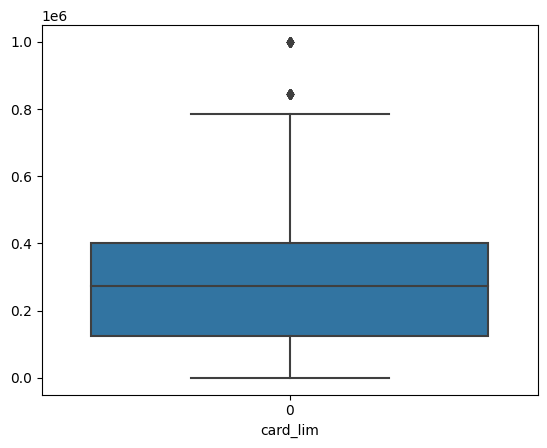

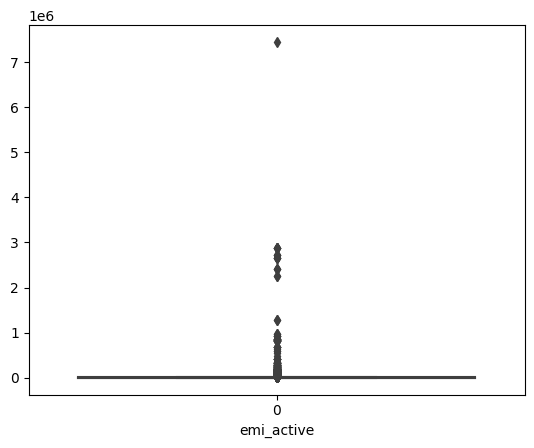

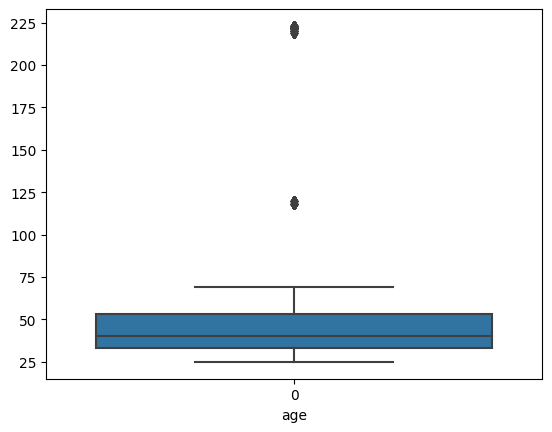

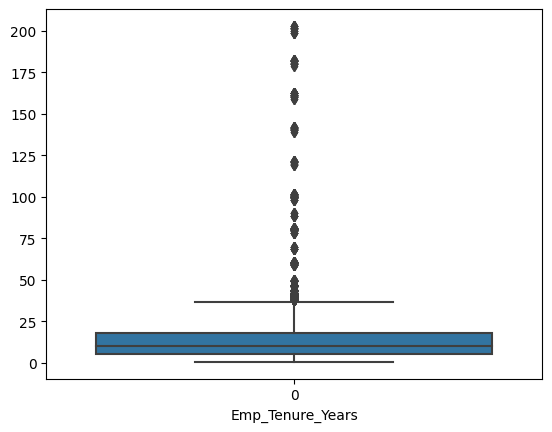

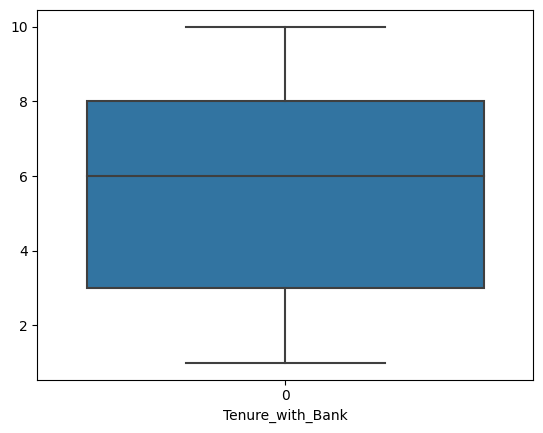

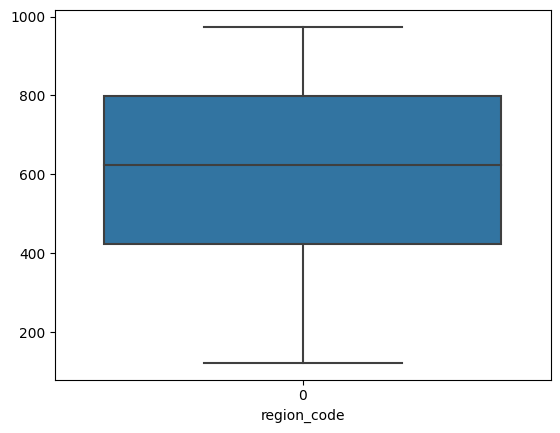

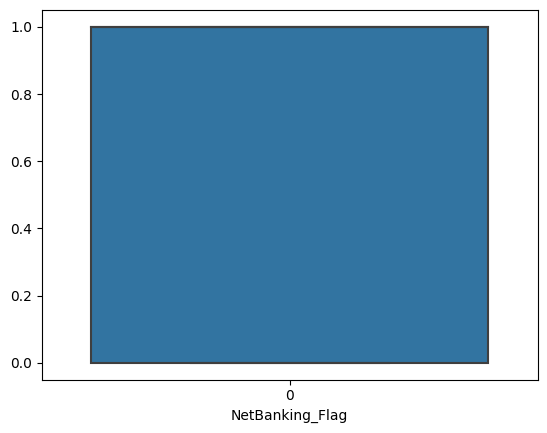

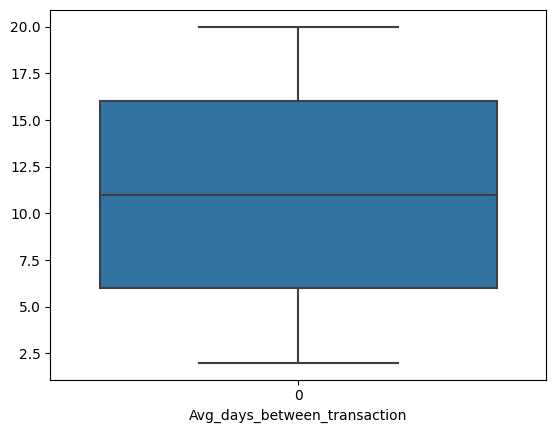

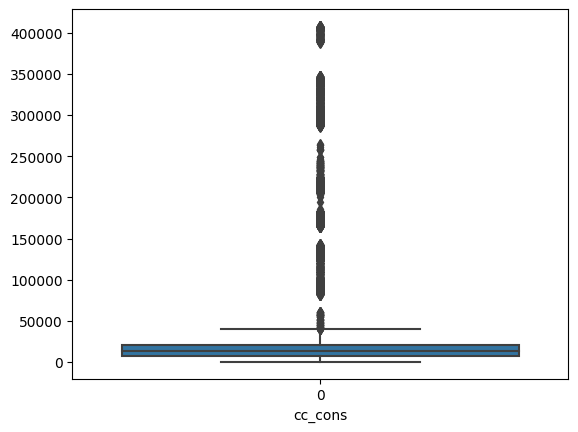

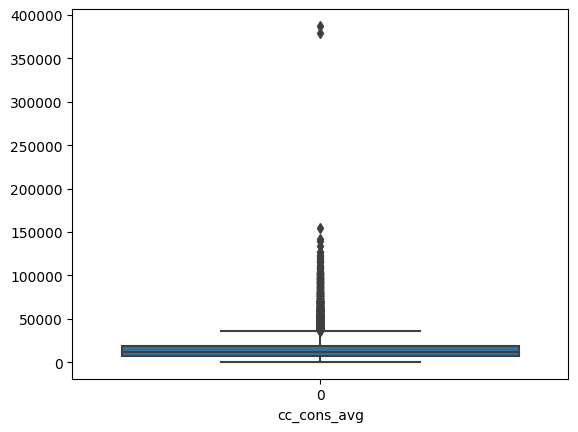

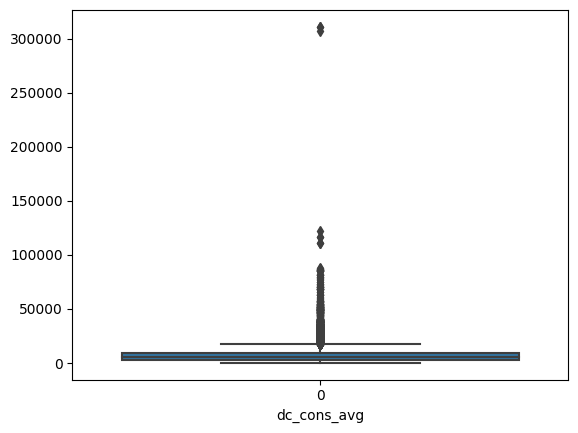

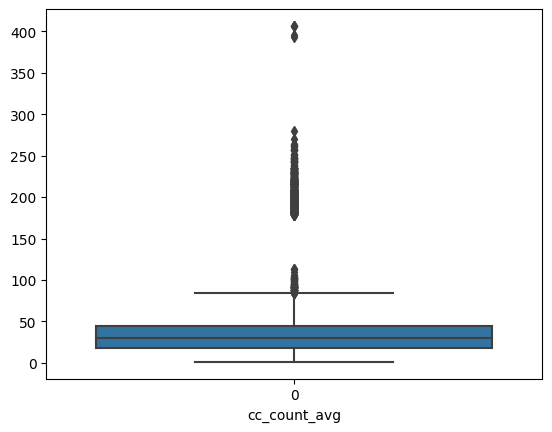

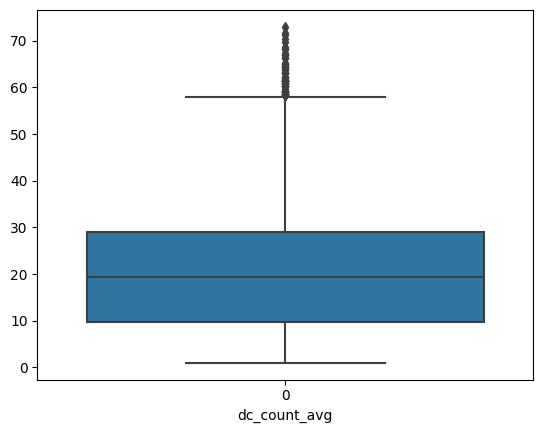

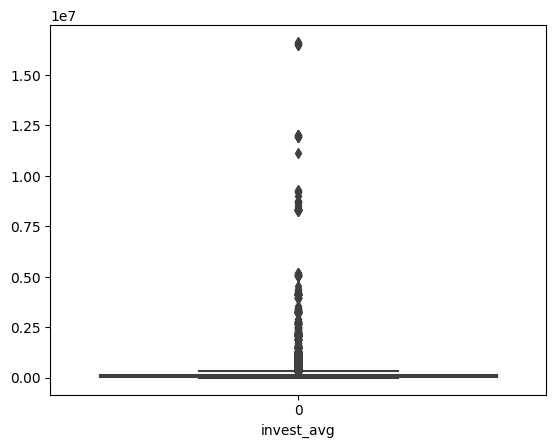

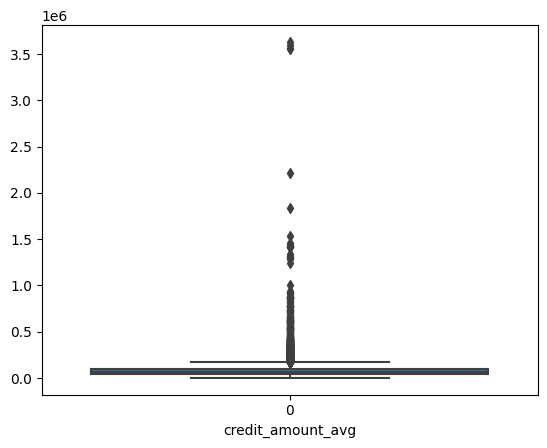

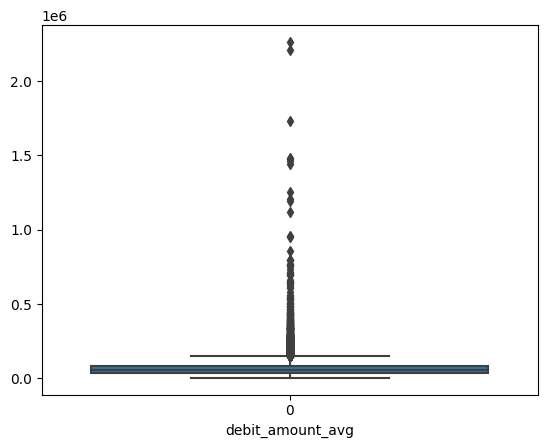

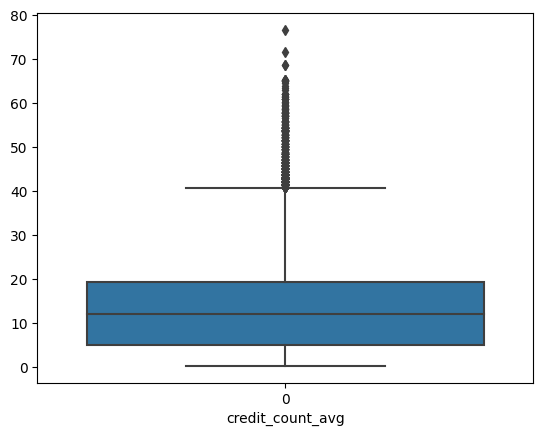

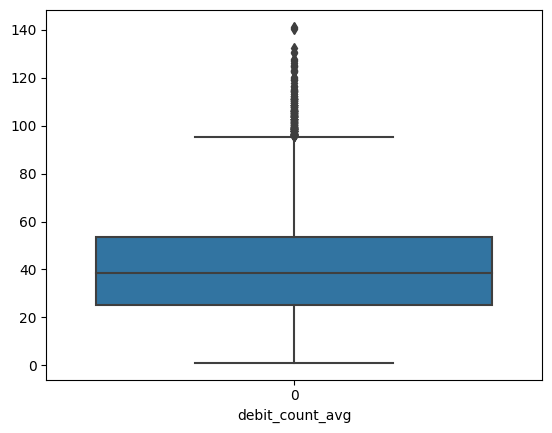

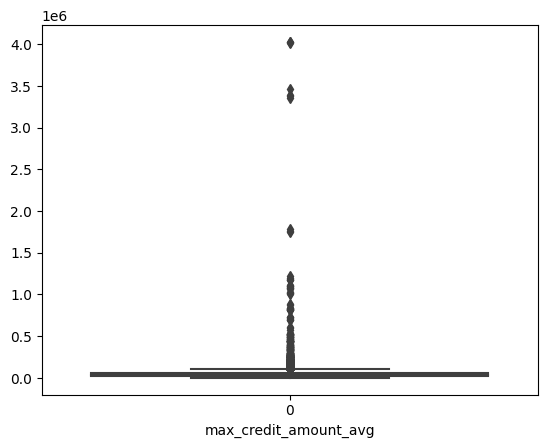

In [36]:
def outlier_on_data(data):
    col=list(data)
    for i in col:
        if  i in data.select_dtypes(include="number").columns:
             sns.boxplot(data[i])
             plt.xlabel(i)  
             plt.show()

outlier_on_data(cust_credit_info_conti_vars)

In [37]:
# since Net banking has no variation we can drop that column
#df.drop(columns="NetBanking_Flag",inplace=True)

#  Detect outliers with the help of IQR Formulae

In [38]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25) 
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

test_1 =detect_outliers(cust_credit_info_conti_vars)

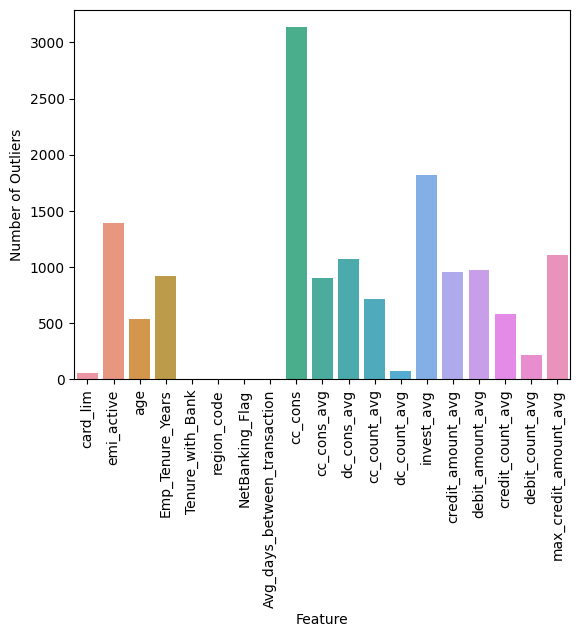

In [39]:
test_1
sns.barplot(x=test_1["Feature"],y=test_1['Number of Outliers'])

plt.xticks(rotation=90)
plt.show()

# Univarient data anlysis for distribution

card_lim


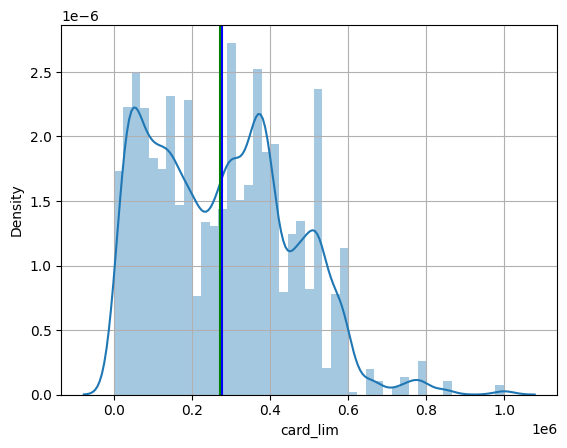

emi_active


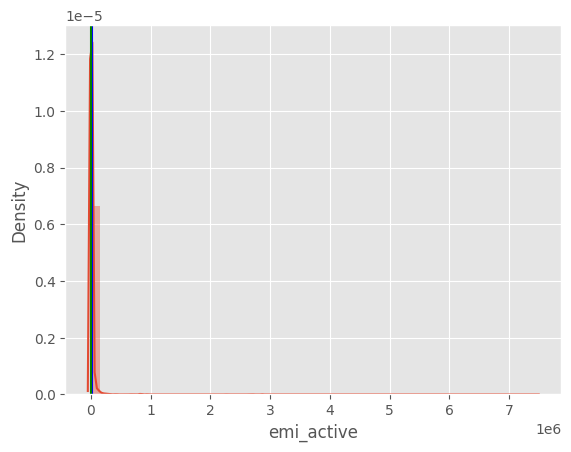

age


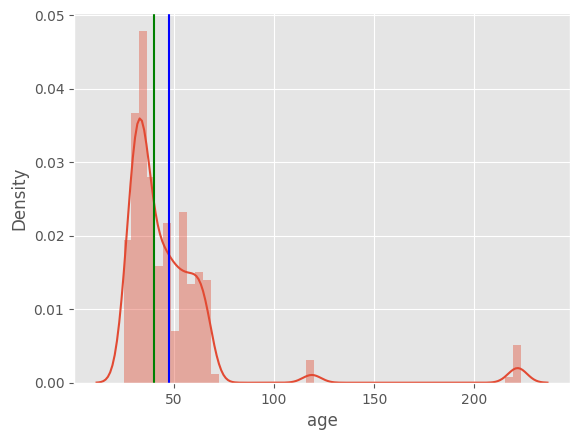

Emp_Tenure_Years


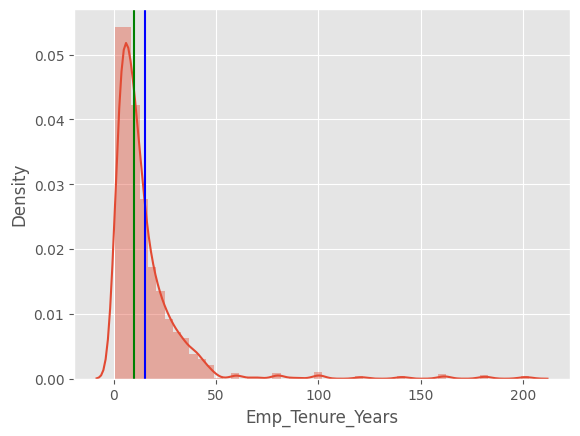

Tenure_with_Bank


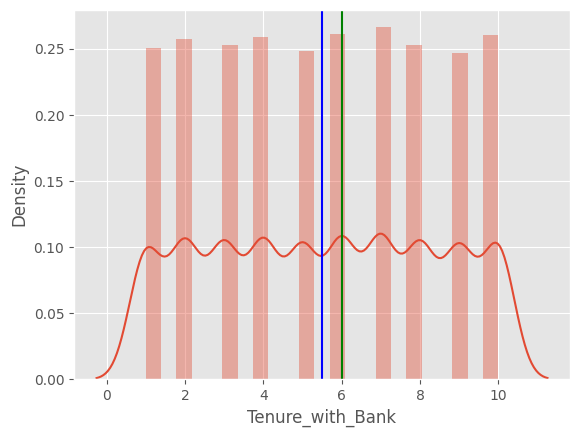

region_code


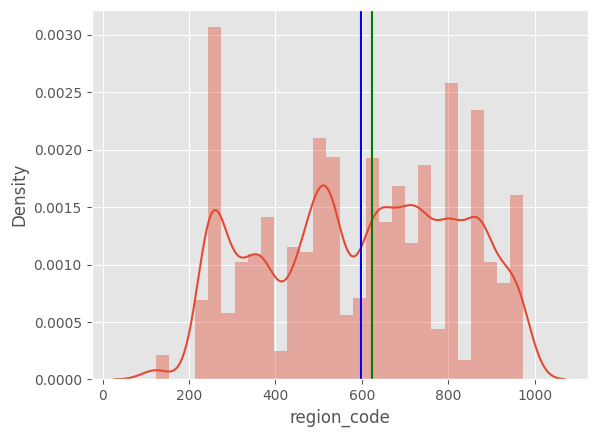

NetBanking_Flag


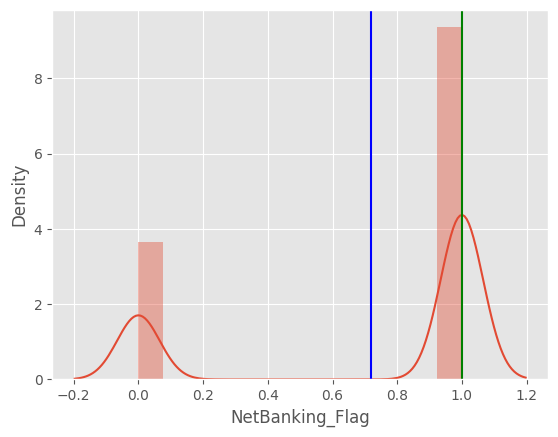

Avg_days_between_transaction


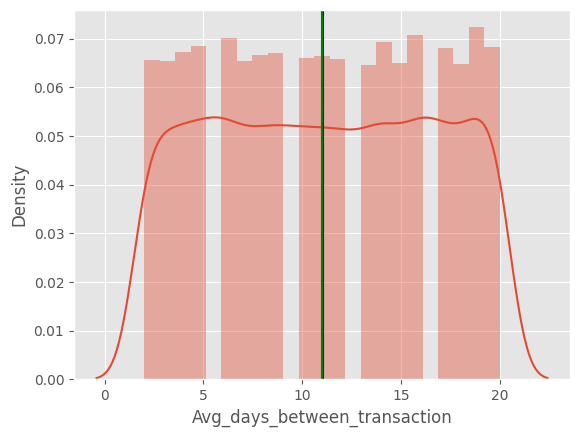

cc_cons


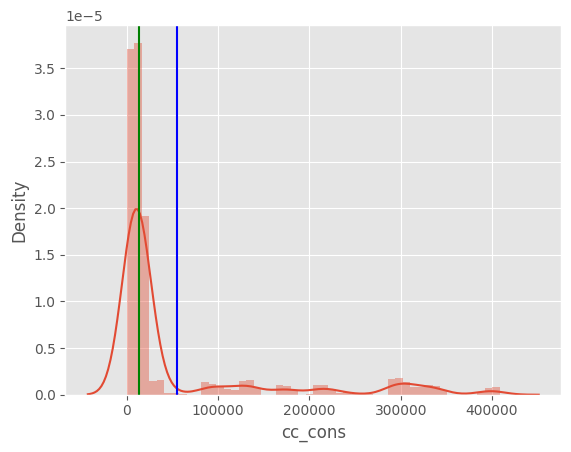

cc_cons_avg


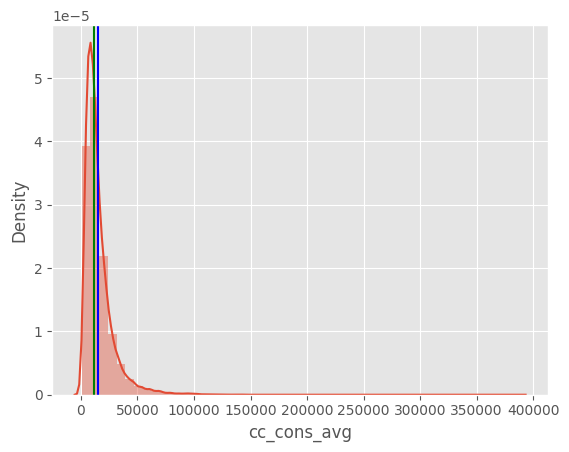

dc_cons_avg


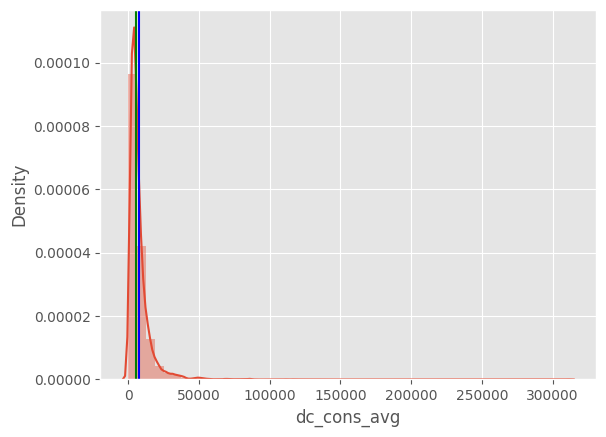

cc_count_avg


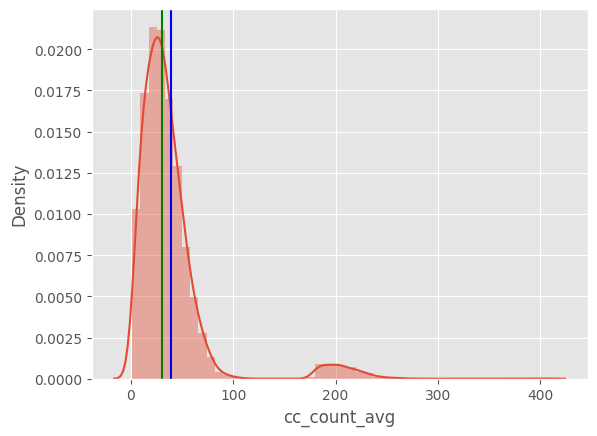

dc_count_avg


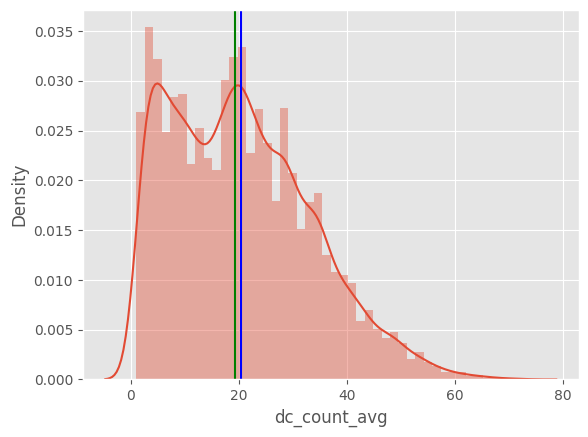

invest_avg


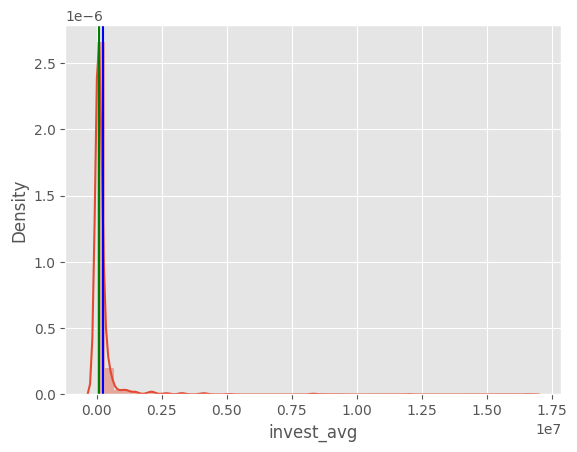

credit_amount_avg


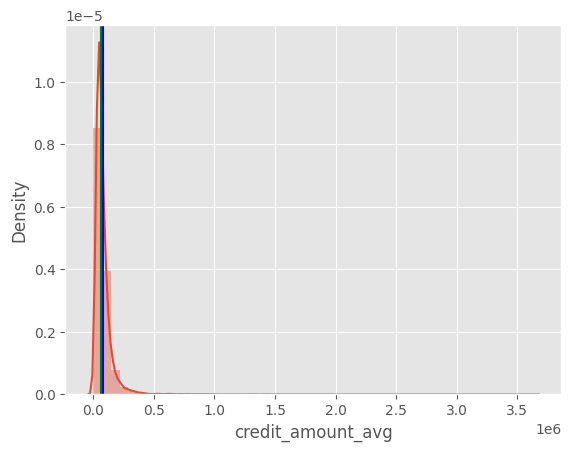

debit_amount_avg


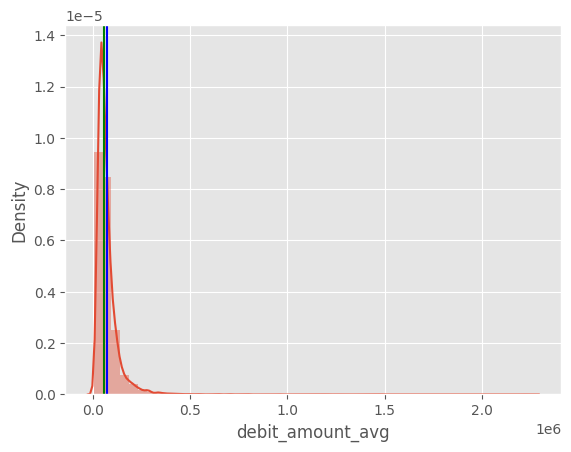

credit_count_avg


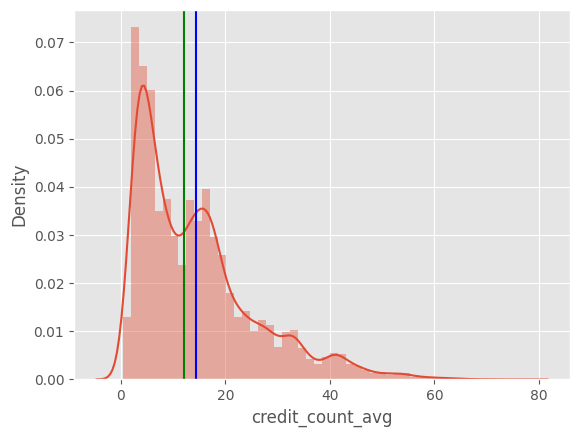

debit_count_avg


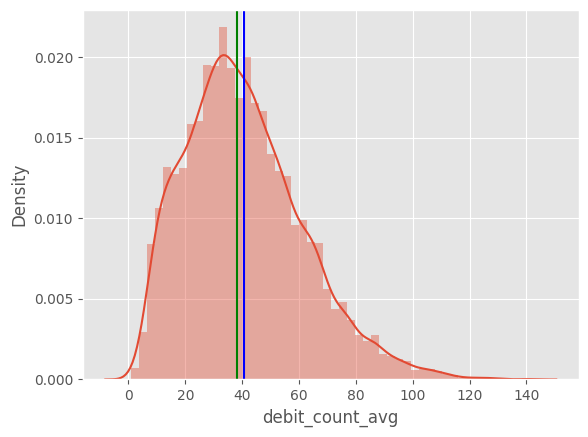

max_credit_amount_avg


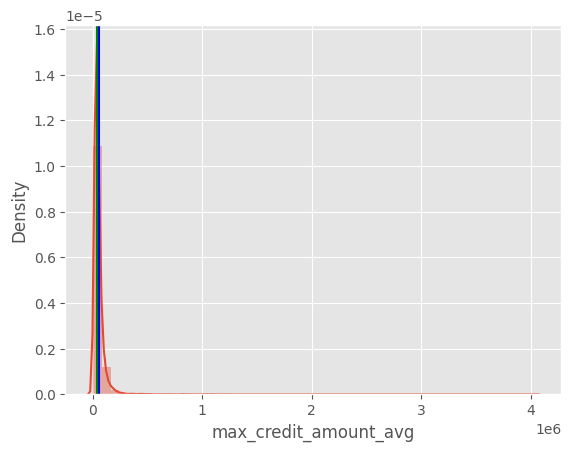

In [40]:
#for continous variables
for i in cust_credit_info_conti_vars.columns:
    print(i)
    sns.distplot(x=cust_credit_info_conti_vars[i])
    
    plt.xlabel(i)
    plt.grid(visible=True)
    plt.axvline(cust_credit_info_conti_vars[i].mean(), color='b')
    plt.axvline(cust_credit_info_conti_vars[i].median(), color='g')
    plt.show()
    plt.style.use("ggplot")
    plt.show()
    

gender_M


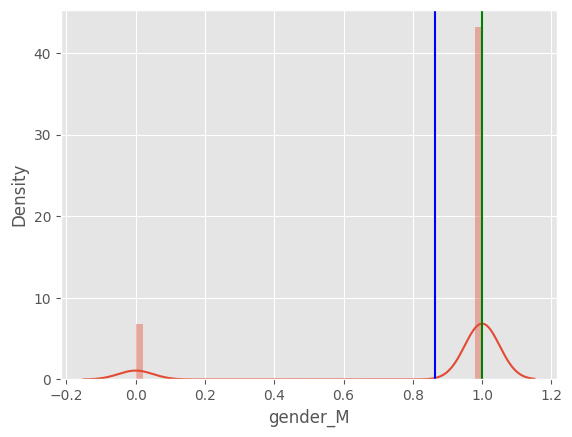

account_type_saving


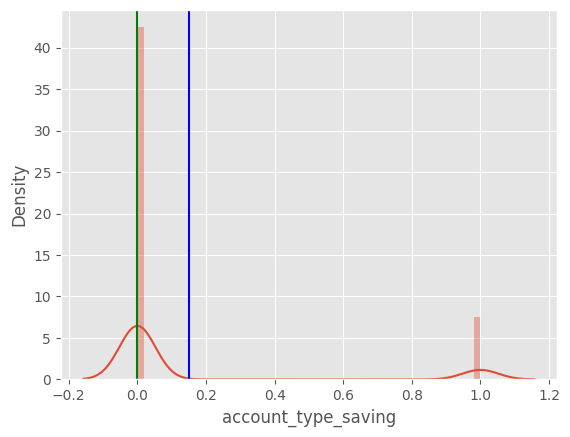

loan_enq_nan


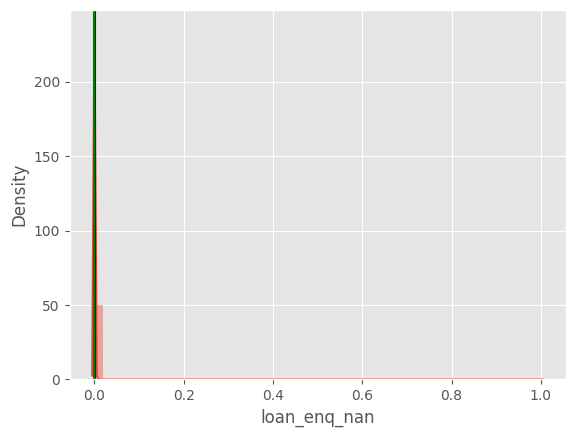

Income


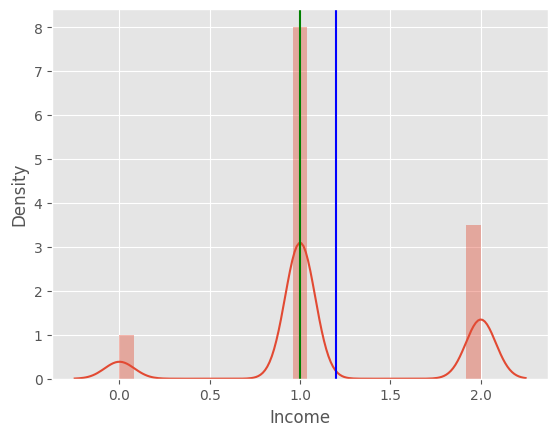

In [41]:
# for categorical dataset
for i in cust_credit_info_cat_vars.columns:
    print(i)
    sns.distplot(x=cust_credit_info_cat_vars[i])
    
    plt.xlabel(i)
    plt.grid(visible=True)
    plt.axvline(cust_credit_info_cat_vars[i].mean(), color='b')
    plt.axvline(cust_credit_info_cat_vars[i].median(), color='g')
    plt.show()
    plt.style.use("ggplot")
    plt.show()

In [42]:
cust_credit_info_conti_vars

,card_lim,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg,invest_avg,credit_amount_avg,debit_amount_avg,credit_count_avg,debit_count_avg,max_credit_amount_avg
0,358000,3448.84,30,7.0,5,956.0,1,20.0,13434.0,3035.310000,4228.946667,10.333333,32.000000,1.107513e+05,39339.790000,38479.500000,13.000000,76.333333,48814.000000
1,114000,3812.69,37,10.2,8,966.0,1,5.0,449.0,29625.846667,5197.143333,21.666667,7.333333,1.605576e+06,31136.666667,53808.333333,13.000000,31.000000,23696.333333
2,360000,9432.90,33,3.9,3,505.0,1,15.0,11968.0,17809.550000,5713.830000,44.000000,36.000000,5.242565e+04,30454.666667,40384.703333,40.000000,23.666667,23906.666667
3,155000,144.61,63,25.8,6,631.0,0,15.0,32029.0,19525.163333,4833.386667,10.000000,31.333333,1.150042e+05,43618.263333,89745.210000,24.000000,26.666667,96506.333333
4,362000,1887.89,33,6.5,7,698.0,0,9.0,16394.0,11974.150000,1745.833333,29.666667,30.666667,6.604182e+03,329982.000000,66653.823333,13.000000,25.000000,18873.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,520000,78966.76,53,13.2,9,653.0,1,20.0,4263.0,8109.666667,5066.283333,14.000000,42.666667,5.684525e+04,32484.166667,182953.833333,5.666667,31.666667,39131.666667
14996,472000,4762.10,44,2.4,9,535.0,1,2.0,11019.0,16042.970000,4919.866667,13.000000,3.333333,6.297191e+04,36269.183333,35495.900000,5.666667,27.000000,117087.156667
14997,44000,2877.33,37,3.4,9,464.0,1,8.0,404227.0,22624.383333,1081.503333,47.000000,10.000000,1.172063e+05,130716.090000,50942.286667,16.000000,27.333333,45017.000000
14998,359000,13006.84,220,40.0,10,536.0,1,3.0,28813.0,60198.043333,14339.416667,59.666667,4.333333,9.231851e+05,58287.430000,62717.120000,11.666667,36.000000,19216.333333


In [43]:
#function for removing outliers
def removing_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.2, 0.2],inclusive=(True, True))
    
    return dataframe

cust_credit_info_conti_vars=removing_outliers(cust_credit_info_conti_vars)

In [44]:
cust_credit_info_conti_vars

,card_lim,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg,invest_avg,credit_amount_avg,debit_amount_avg,credit_count_avg,debit_count_avg,max_credit_amount_avg
0,358000,3448.84,32,7.0,5,809.0,1,17.0,13434.0,6424.643333,4228.946667,15.666667,31.666667,110751.30000,39339.790000,38479.500000,13.000000,57.333333,48814.000000
1,114000,3812.69,37,10.2,8,809.0,1,5.0,5442.0,21479.333333,5197.143333,21.666667,7.666667,188811.21250,36836.083333,53808.333333,13.000000,31.000000,25270.666667
2,360000,9432.90,33,4.2,3,505.0,1,15.0,11968.0,17809.550000,5713.830000,44.000000,31.666667,52425.65000,36836.083333,40384.703333,22.333333,23.666667,25270.666667
3,155000,1166.45,58,21.0,6,631.0,0,15.0,32029.0,19525.163333,4833.386667,15.666667,31.333333,115004.25000,43618.263333,89745.210000,22.333333,26.666667,65142.000000
4,362000,1887.89,33,6.5,7,698.0,0,9.0,16394.0,11974.150000,2824.000000,29.666667,30.666667,28891.02500,103492.166667,66653.823333,13.000000,25.000000,25270.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,430000,11391.81,53,13.2,8,653.0,1,17.0,5442.0,8109.666667,5066.283333,15.666667,31.666667,56845.25000,36836.083333,90732.113333,5.666667,31.666667,39131.666667
14996,430000,4762.10,44,4.2,8,535.0,1,5.0,11019.0,16042.970000,4919.866667,15.666667,7.666667,62971.90503,36836.083333,35495.900000,5.666667,27.000000,65142.000000
14997,98000,2877.33,37,4.2,8,464.0,1,8.0,84818.0,21479.333333,2824.000000,47.000000,10.000000,117206.25500,103492.166667,50942.286667,16.000000,27.333333,45017.000000
14998,359000,11391.81,58,21.0,8,536.0,1,5.0,28813.0,21479.333333,10209.186667,48.666667,7.666667,188811.21250,58287.430000,62717.120000,11.666667,36.000000,25270.666667


card_lim


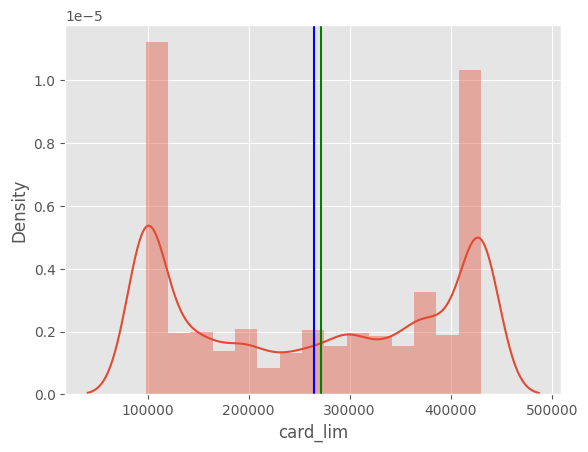

emi_active


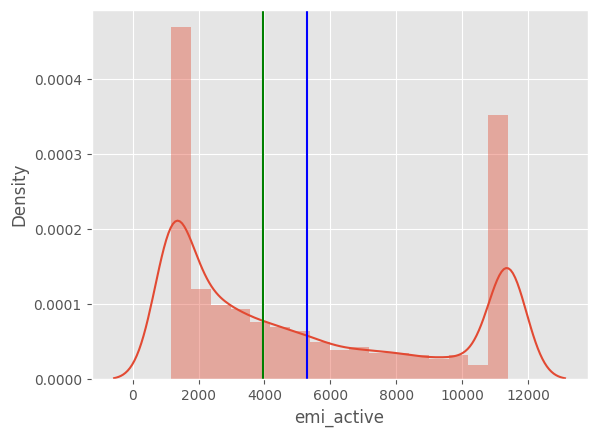

age


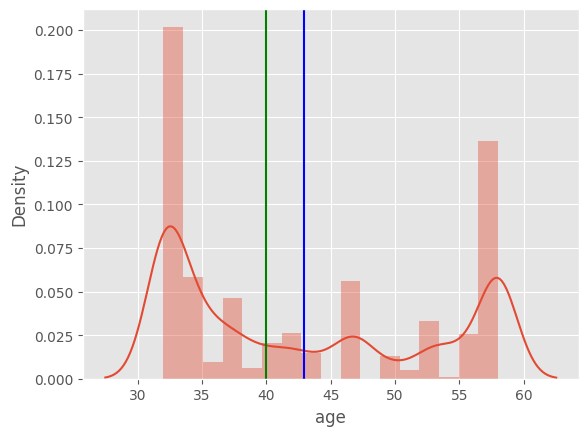

Emp_Tenure_Years


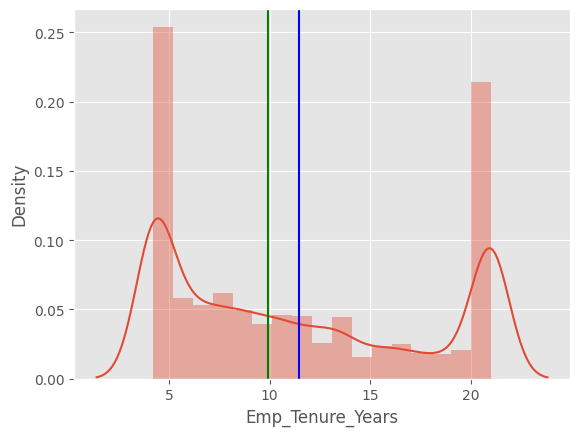

Tenure_with_Bank


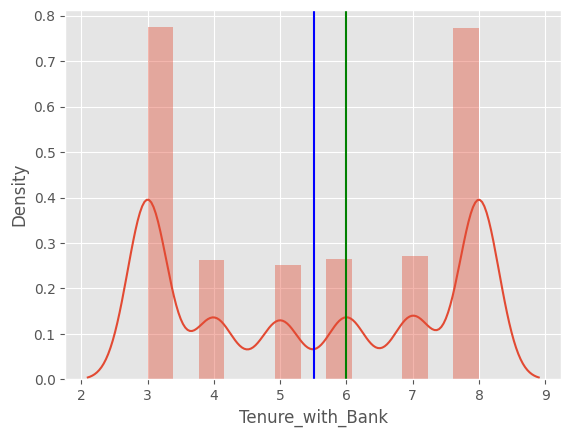

region_code


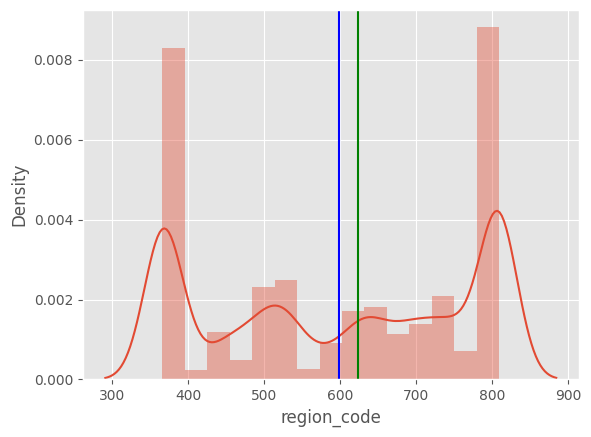

NetBanking_Flag


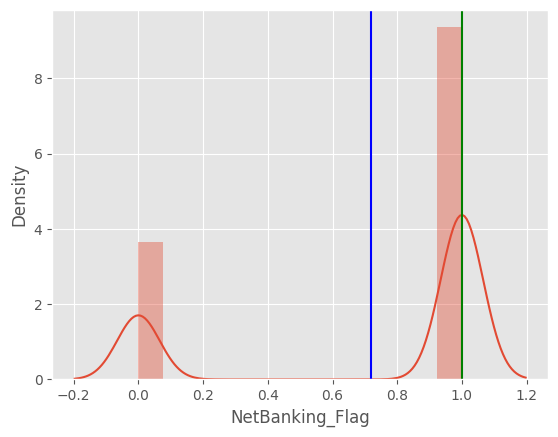

Avg_days_between_transaction


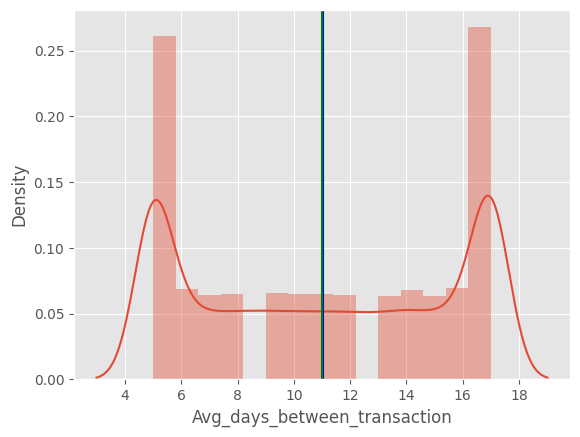

cc_cons


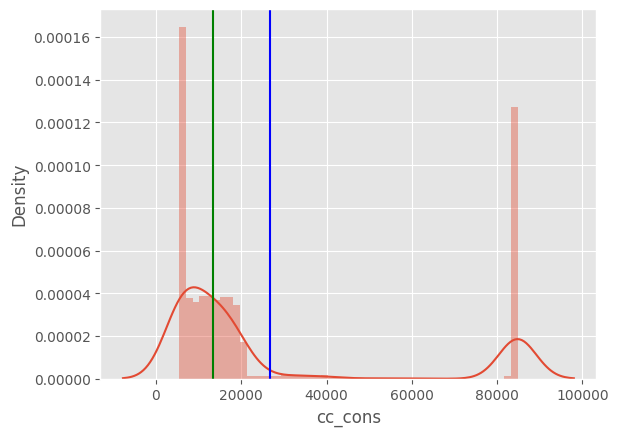

cc_cons_avg


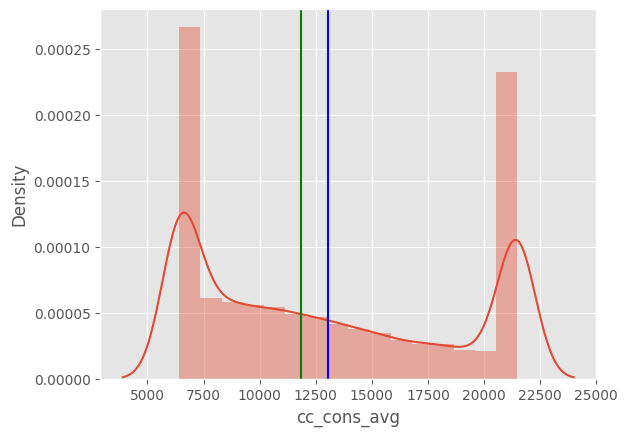

dc_cons_avg


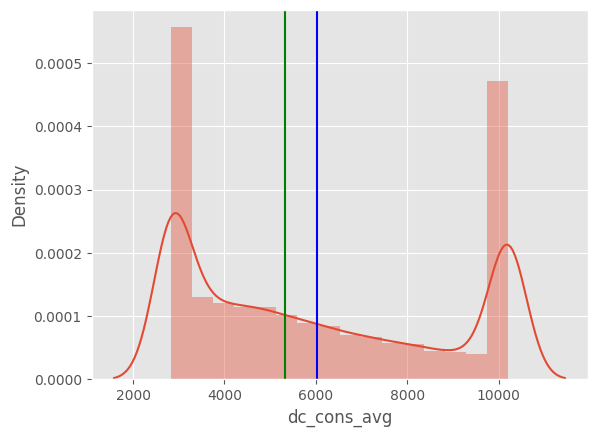

cc_count_avg


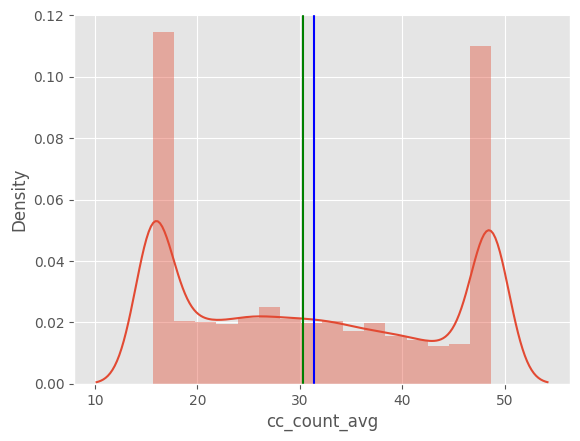

dc_count_avg


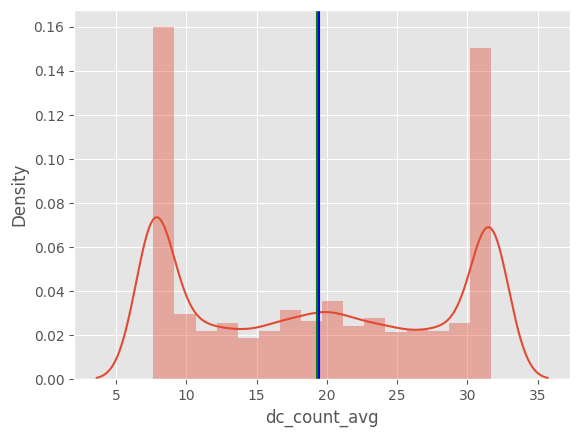

invest_avg


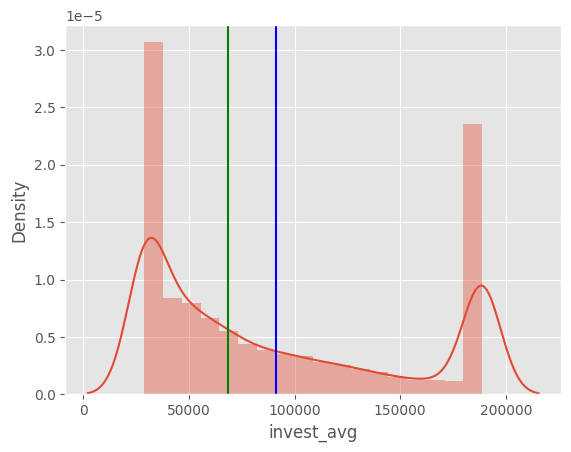

credit_amount_avg


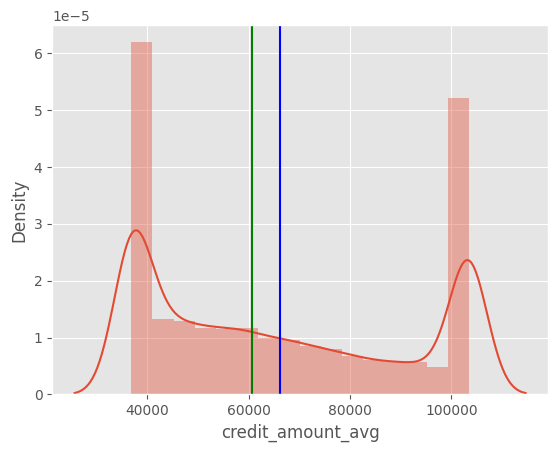

debit_amount_avg


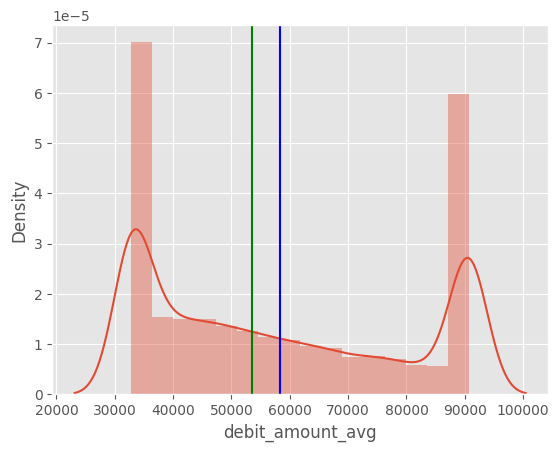

credit_count_avg


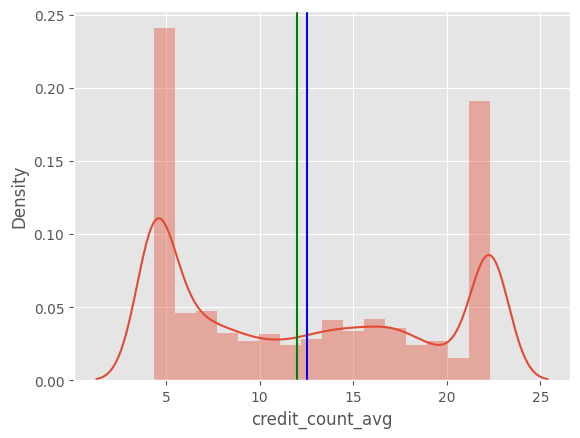

debit_count_avg


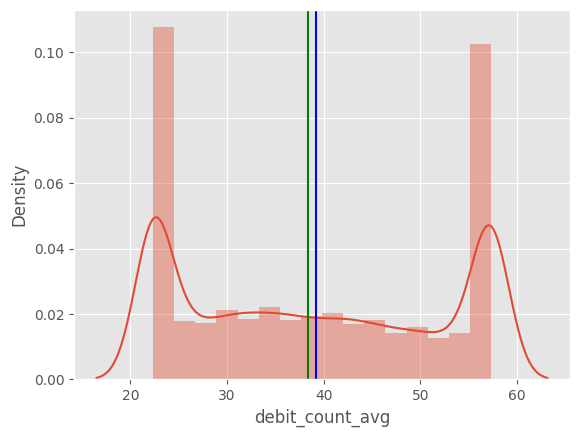

max_credit_amount_avg


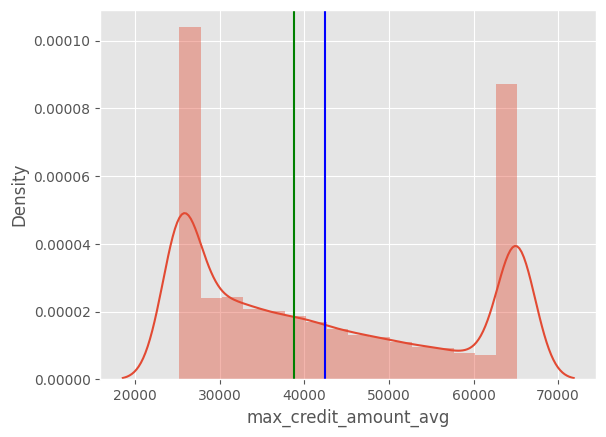

In [45]:
#After removing outliers lets check the distribution .
for i in cust_credit_info_conti_vars.columns:
    print(i)
    sns.distplot(x=cust_credit_info_conti_vars[i])
    
    plt.xlabel(i)
    plt.grid(visible=True)
    plt.axvline(cust_credit_info_conti_vars[i].mean(), color='b')
    plt.axvline(cust_credit_info_conti_vars[i].median(), color='g')
    plt.show()
    plt.style.use("ggplot")
    plt.show()

In [46]:
detect_outliers(cust_credit_info_conti_vars)

,Feature,Number of Outliers
0,card_lim,0
1,emi_active,0
2,age,0
3,Emp_Tenure_Years,0
4,Tenure_with_Bank,0
5,region_code,0
6,NetBanking_Flag,0
7,Avg_days_between_transaction,0
8,cc_cons,3134
9,cc_cons_avg,0


In [47]:
test_1

,Feature,Number of Outliers
0,card_lim,59
1,emi_active,1393
2,age,534
3,Emp_Tenure_Years,919
4,Tenure_with_Bank,0
5,region_code,0
6,NetBanking_Flag,0
7,Avg_days_between_transaction,0
8,cc_cons,3134
9,cc_cons_avg,901


In [48]:
cust_credit_info_conti_vars.skew()

card_lim                       -0.038156
emi_active                      0.504818
age                             0.372957
Emp_Tenure_Years                0.376933
Tenure_with_Bank               -0.008412
region_code                    -0.111413
NetBanking_Flag                -0.977480
Avg_days_between_transaction   -0.010023
cc_cons                         1.333239
cc_cons_avg                     0.325628
dc_cons_avg                     0.360042
cc_count_avg                    0.138931
dc_count_avg                    0.039072
invest_avg                      0.586971
credit_amount_avg               0.320487
debit_amount_avg                0.322334
credit_count_avg                0.197614
debit_count_avg                 0.102109
max_credit_amount_avg           0.369547
dtype: float64

In [49]:
#loan_enq has only one value so we can drop it.
cust_credit_info_cat_vars.drop(columns="loan_enq_nan",inplace=True)

# Bivariate analysis

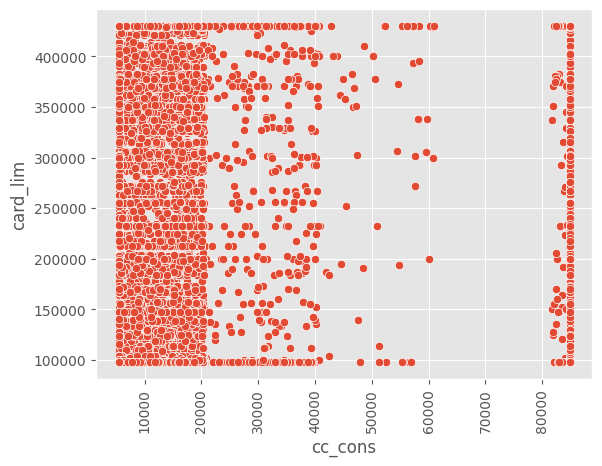

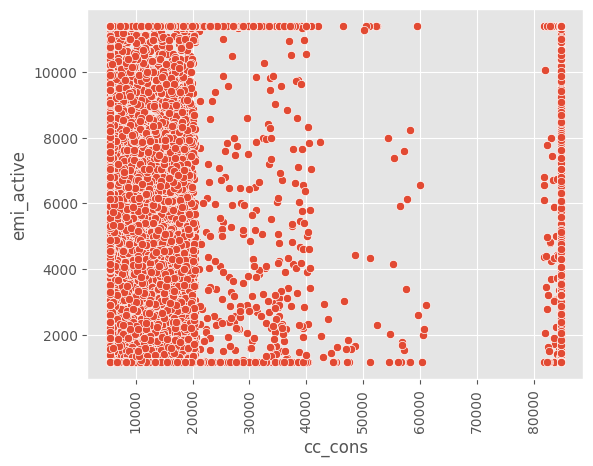

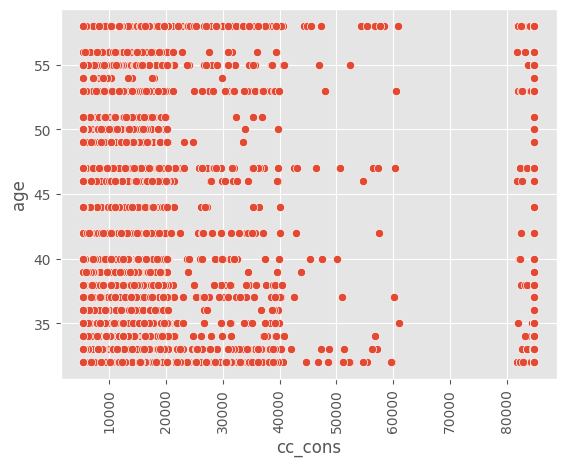

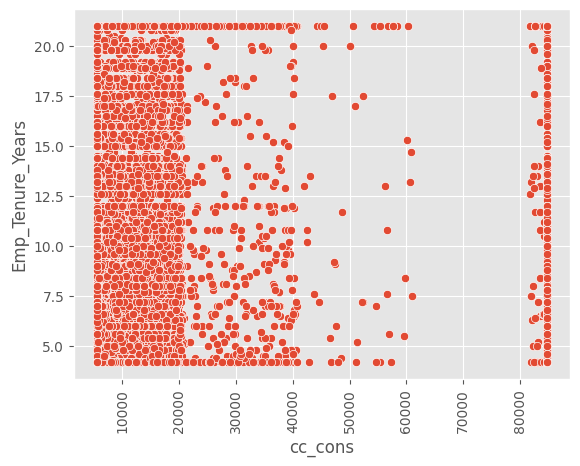

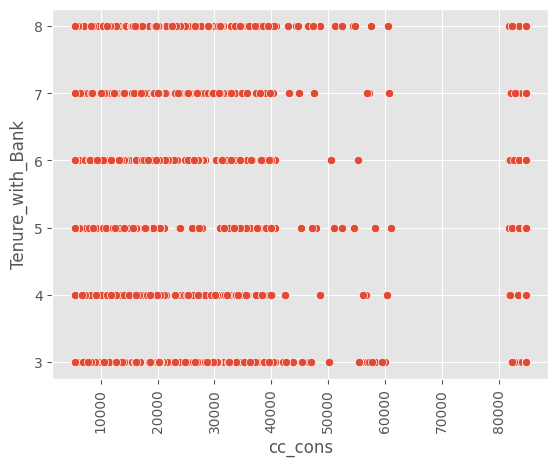

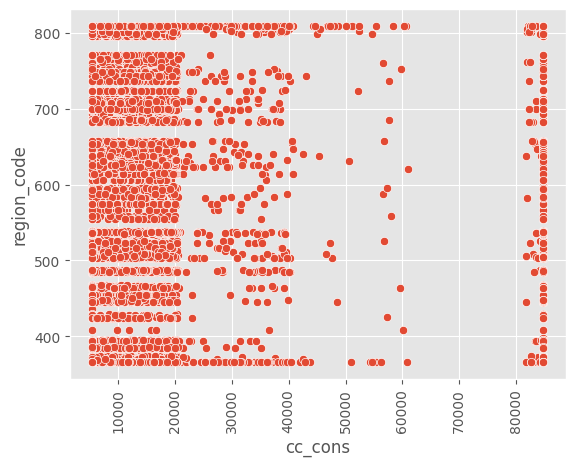

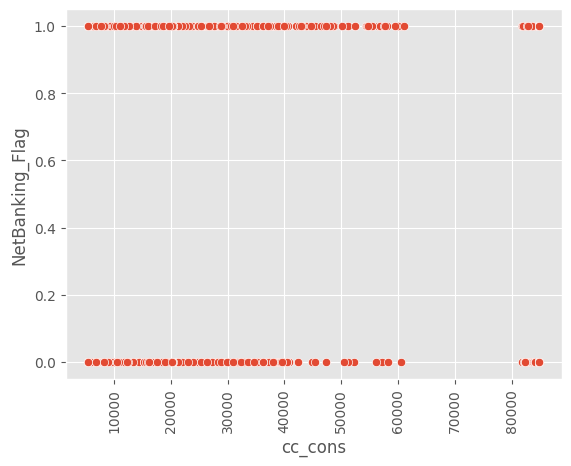

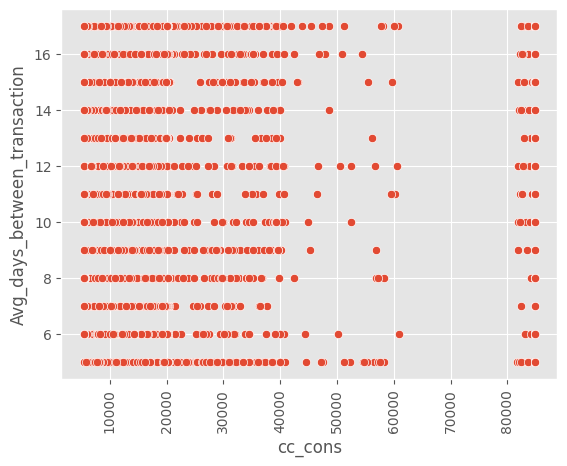

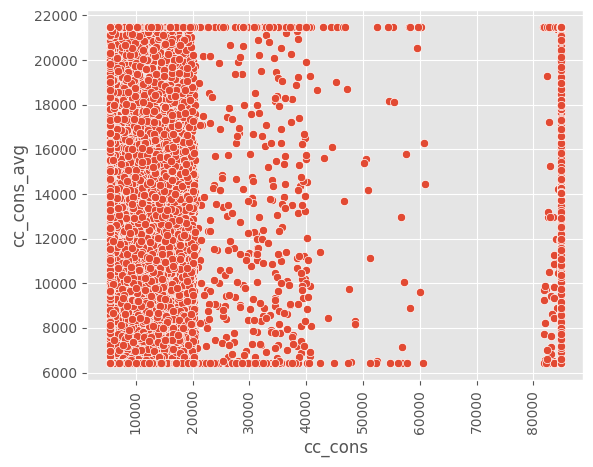

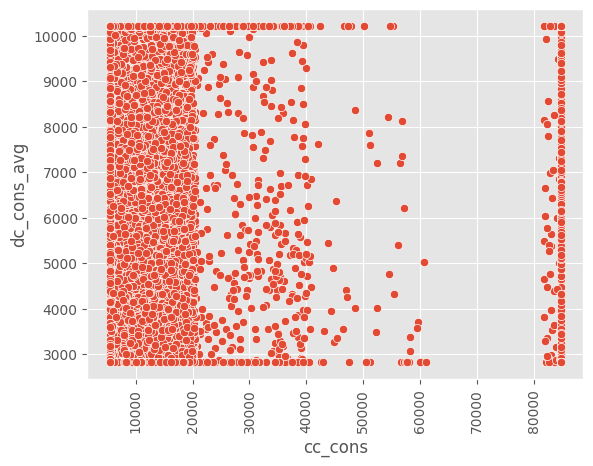

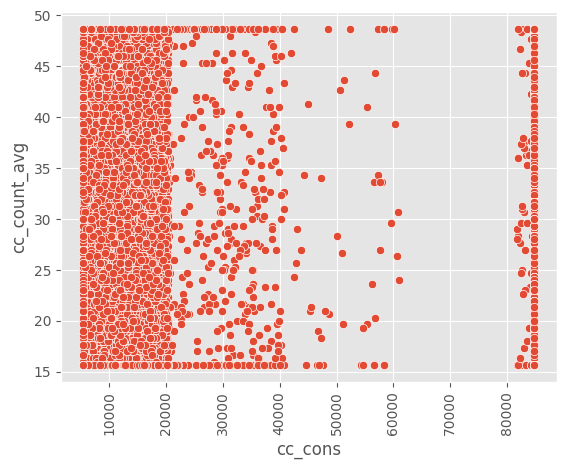

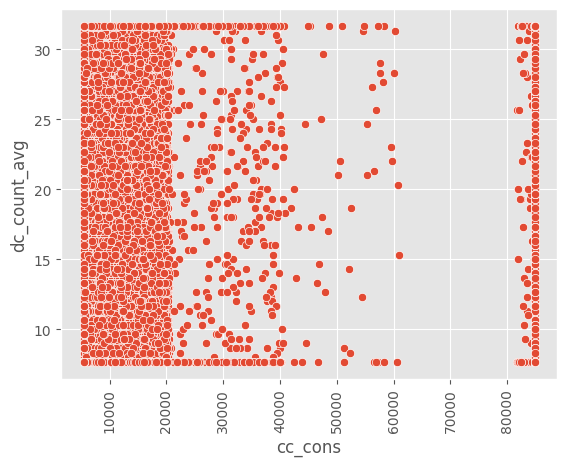

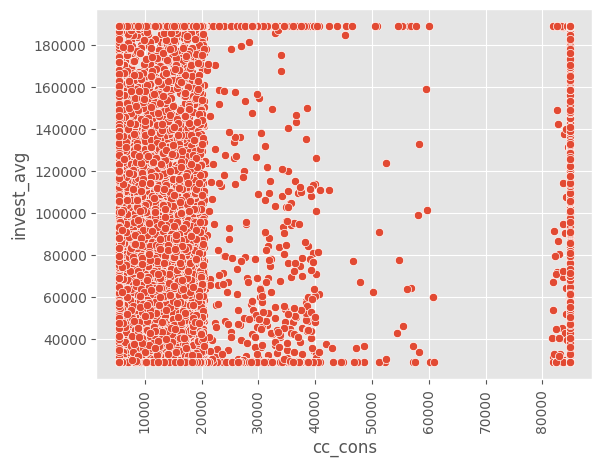

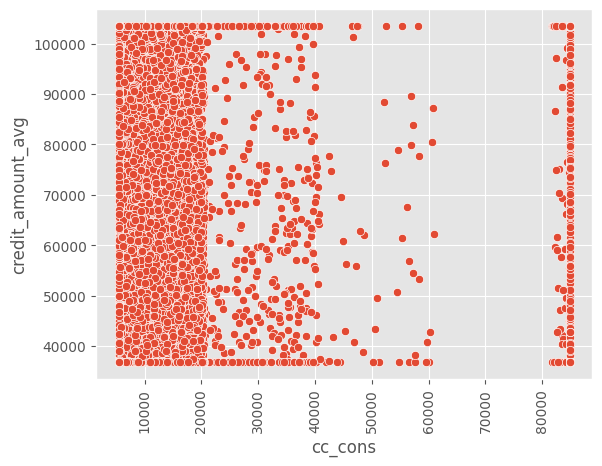

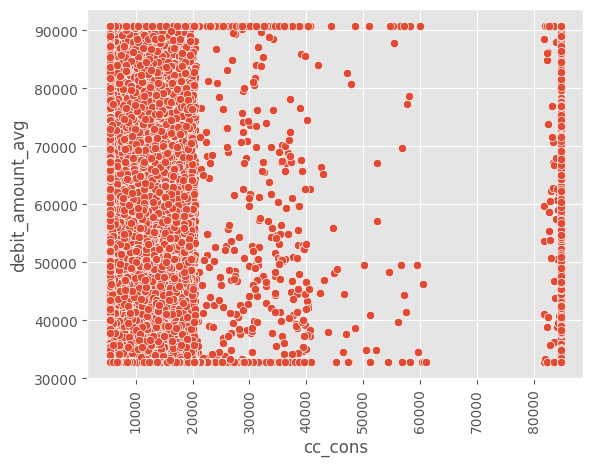

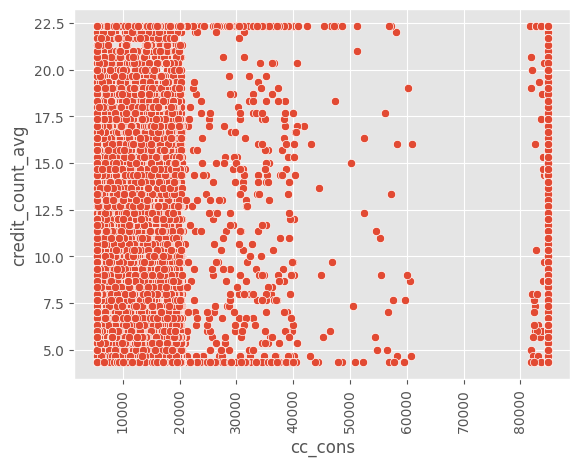

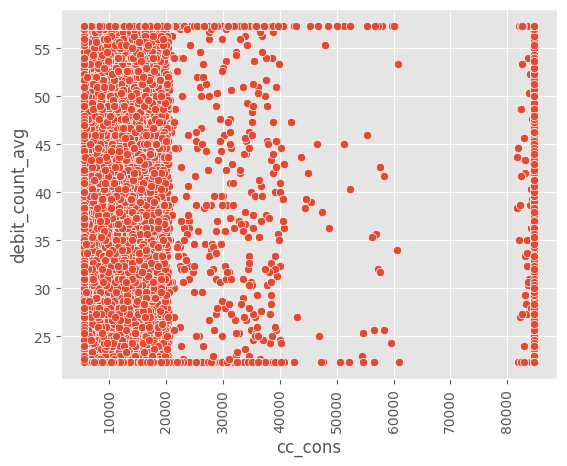

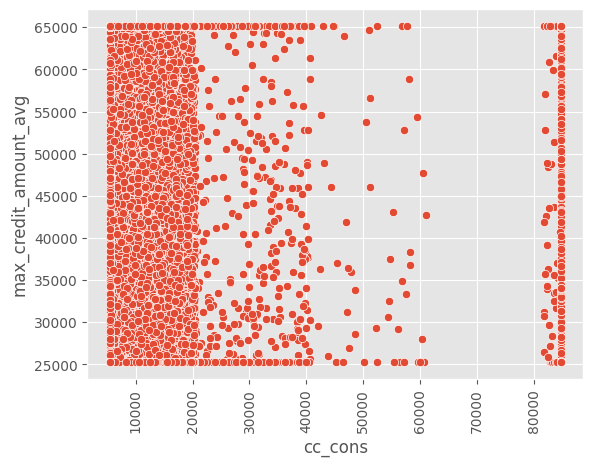

In [50]:
# checking the bivariate analysis wih target values (cc_cons)
for i in cust_credit_info_conti_vars.columns[(cust_credit_info_conti_vars.columns!="cc_cons")]:
    sns.scatterplot(data=cust_credit_info_conti_vars,x=cust_credit_info_conti_vars["cc_cons"],y=cust_credit_info_conti_vars[i])
    plt.xticks(rotation='vertical')
    plt.show()

Insights from Bivariate Analysis:
1. There are as such no relationship between any two variable,
which shows there is no linear relation ship between features and target variable hence stats that linear relational data model will predict worstt for this data set.

In [51]:
cust_consumption = pd.concat([ cust_credit_info_conti_vars , cust_credit_info_cat_vars], axis = 1)
cust_consumption.head(2)

,card_lim,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons,cc_cons_avg,...,dc_count_avg,invest_avg,credit_amount_avg,debit_amount_avg,credit_count_avg,debit_count_avg,max_credit_amount_avg,gender_M,account_type_saving,Income
0,358000,3448.84,32,7.0,5,809.0,1,17.0,13434.0,6424.643333,...,31.666667,110751.3000,39339.790000,38479.500000,13.0,57.333333,48814.000000,1.0,0.0,1.0
1,114000,3812.69,37,10.2,8,809.0,1,5.0,5442.0,21479.333333,...,7.666667,188811.2125,36836.083333,53808.333333,13.0,31.000000,25270.666667,1.0,0.0,2.0


In [52]:
cust_consumption["cc_cons"].dtype
# since the target value is integer it will be regression problem.

dtype('float64')

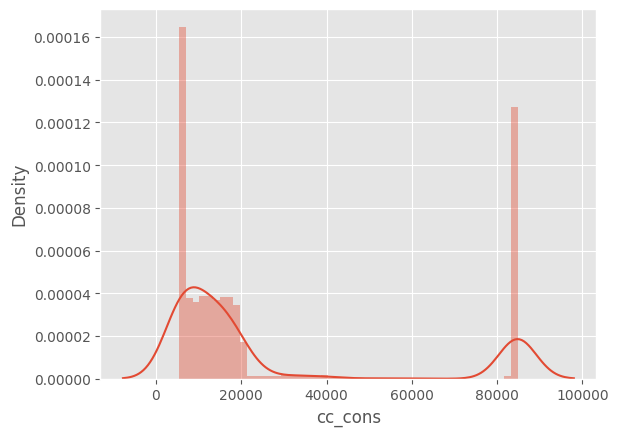

In [53]:
#finding the distribution plot for target variables.
sns.distplot(cust_consumption["cc_cons"])
plt.show()

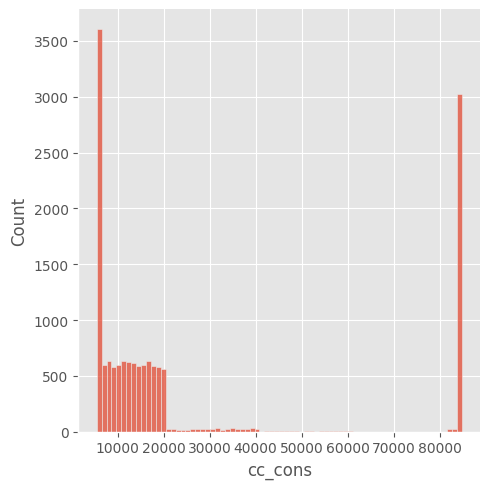

In [54]:
sns.displot(data=cust_consumption, x='cc_cons', kind='hist')

In [55]:
# Taking log for cc_cons(target variable) variable of the train dataset 

cust_consumption['cc_cons'] = cust_consumption['cc_cons'].apply(lambda x: np.log(x+.001))

# Feature selection based on importance using F - Regression

In [56]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [57]:
cust_consumption.isnull().sum()

card_lim                        0
emi_active                      0
age                             0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons                         0
cc_cons_avg                     0
dc_cons_avg                     0
cc_count_avg                    0
dc_count_avg                    0
invest_avg                      0
credit_amount_avg               0
debit_amount_avg                0
credit_count_avg                0
debit_count_avg                 0
max_credit_amount_avg           0
gender_M                        0
account_type_saving             0
Income                          0
dtype: int64

In [58]:
feature_columns=cust_consumption.columns.difference(['cc_cons'])

In [59]:
# seperate the X and y columns
features = cust_consumption[['Avg_days_between_transaction', 'Emp_Tenure_Years', 'Income',
       'NetBanking_Flag', 'Tenure_with_Bank', 'account_type_saving', 'age',
       'card_lim', 'cc_cons_avg', 'cc_count_avg', 'credit_amount_avg',
       'credit_count_avg', 'dc_cons_avg', 'dc_count_avg', 'debit_amount_avg',
       'debit_count_avg', 'emi_active', 'gender_M', 'invest_avg',
       'max_credit_amount_avg', 'region_code']]
target = cust_consumption.cc_cons

# do the f_regression
F_values, p_values  = f_regression( features, target )

In [60]:
# combine the output in dataframe
F_regression_op = pd.DataFrame([feature_columns, F_values.round(2), p_values.round(4)]).T

# add the column names
F_regression_op.columns = ['Features', 'F_values', 'p_values' ]
F_regression_op

,Features,F_values,p_values
0,Avg_days_between_transaction,0.62,0.4293
1,Emp_Tenure_Years,1.0,0.3171
2,Income,0.2,0.6523
3,NetBanking_Flag,0.04,0.8418
4,Tenure_with_Bank,0.39,0.53
5,account_type_saving,0.08,0.7779
6,age,2.33,0.1272
7,card_lim,0.45,0.5007
8,cc_cons_avg,4.5,0.034
9,cc_count_avg,0.23,0.6286


In [61]:
# output of the f_regression
feature_columns = list( F_regression_op.loc[ F_regression_op.p_values <=.05, 'Features' ] )
print(len(feature_columns))
print(feature_columns)

2
['cc_cons_avg', 'emi_active']


# VIF (Variance Inflation Factor): Check the multicollinieirity for all the variables in the model

In [62]:
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [63]:
model_param = 'cc_cons ~ ' +' + '.join(feature_columns)
model_param

'cc_cons ~ cc_cons_avg + emi_active'

In [64]:
# separate the Y and X variables
y, X = dmatrices( model_param, cust_consumption, return_type = 'dataframe' )

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,8.0
1,cc_cons_avg,1.0
2,emi_active,1.0


### Split the data for model building

In [65]:
# Divide the data into training and testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(cust_consumption, test_size = 0.3, random_state = 111)

#  Building a Linear regression model

In [66]:
m_equation = 'cc_cons ~ ' + ' + '.join( feature_columns )
m_equation

'cc_cons ~ cc_cons_avg + emi_active'

In [67]:
lm = smf.ols( m_equation, train ).fit()
print( lm.summary() )

                            OLS Regression Results                            
Dep. Variable:                cc_cons   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.567
Date:                Sun, 10 Sep 2023   Prob (F-statistic):              0.209
Time:                        21:42:37   Log-Likelihood:                -14558.
No. Observations:               10500   AIC:                         2.912e+04
Df Residuals:                   10497   BIC:                         2.914e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.6283      0.027    360.292      

### Predict the sales on the training and testing data

In [68]:
# training
train.loc[:, 'pred_cons'] = lm.predict(train)

In [69]:
# testing/validation
test.loc[:, 'pred_cons'] = lm.predict(test)

In [70]:
train[['cc_cons', 'pred_cons']]

,cc_cons,pred_cons
5323,9.511037,9.644282
4938,9.910612,9.649742
9402,9.819780,9.695203
10466,9.841719,9.677432
3301,9.358416,9.658145
...,...,...
7443,9.887307,9.700984
4182,9.898877,9.671733
4820,8.902320,9.667808
10196,9.233471,9.697488


In [71]:
RMSPE_train = np.sqrt(np.mean(np.square((train.cc_cons - train.pred_cons) / train.cc_cons)))*100
RMSPE_test = np.sqrt(np.mean(np.square((test.cc_cons - test.pred_cons) / test.cc_cons)))*100

print('RMSPE of training data: ', RMSPE_train,  ' | ', 'RMSPE of testing data: ', RMSPE_test)

RMSPE of training data:  9.574871455013119  |  RMSPE of testing data:  9.571872397012926


## Machine Learning

In [72]:
#Spliting the data in train_x, test_x, train_y, test_y
train_x, test_x, train_y, test_y = train_test_split(cust_consumption[feature_columns],cust_consumption.cc_cons, test_size=0.2, random_state=21)

### Decision tree :

In [73]:
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [74]:
#Model building
param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7)}
data_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 3, n_jobs=-1,verbose=1)
data_tree.fit(train_x,train_y)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4]),
                         'max_features': array([4, 5, 6])},
             verbose=1)

In [75]:
#Predicting values for both training and testing data sets
tree_train_pred= data_tree.predict(train_x)
tree_test_pred=data_tree.predict(test_x)

In [76]:
tree_test_pred

array([9.75187902, 9.67262199, 9.60423254, ..., 9.60423254, 9.75187902,
       9.60423254])

In [77]:
test_y

14910     9.531989
8253      9.924025
5969     11.348263
3031      8.601902
7334      8.601902
           ...    
3028      8.601902
9877      8.935377
14015     9.707838
12259    10.922118
1458      9.390242
Name: cc_cons, Length: 3000, dtype: float64

In [104]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print(mean_absolute_percentage_error(tree_test_pred,test_y))


0.0800406862921648


In [79]:
#Root Mean Square Percentage Error

RMSPE_train = np.sqrt(np.mean(np.square((train_y - tree_train_pred) / train_y)))*100
RMSPE_test = np.sqrt(np.mean(np.square((test_y- tree_test_pred) / test_y)))*100

print('RMSPE of training data: ', RMSPE_train,  ' | ', 'RMSPE of testing data: ', RMSPE_test)

RMSPE of training data:  9.565141047122378  |  RMSPE of testing data:  9.571500568658585


 ### Ensemble Learining - Random Forest :

In [80]:
#Importing required packages
from sklearn.ensemble import RandomForestRegressor

In [81]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

data_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1, verbose=1)
data_rf.fit(train_x,train_y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [50, 60, 70, 80, 100]},
             verbose=1)

In [82]:
#Predicting values for both training and testing data sets
rf_train_pred=data_rf.predict(train_x)
rf_test_pred=data_rf.predict(test_x)

In [83]:
#Root Mean Square Percentage Error

RMSPE_train = np.sqrt(np.mean(np.square((train_y - rf_train_pred) / train_y)))*100
RMSPE_test = np.sqrt(np.mean(np.square((test_y- rf_test_pred) / test_y)))*100

print('RMSPE of training data: ', RMSPE_train,  ' | ', 'RMSPE of testing data: ', RMSPE_test)

RMSPE of training data:  9.561136241064357  |  RMSPE of testing data:  9.574931796648462


### Boosting - xgboost 

In [84]:
#Importing Required packages
import xgboost

In [85]:
pargrid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1 , verbose=1)

data_xg=gscv_xg.fit(train_x, train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [86]:
#Predicting values for both training and testing data sets
xg_train_pred=data_xg.predict(train_x)
xg_test_pred=data_xg.predict(test_x)

In [87]:
#Root Mean Square Percentage Error

RMSPE_train = np.sqrt(np.mean(np.square((train_y - xg_train_pred) / train_y)))*100
RMSPE_test = np.sqrt(np.mean(np.square((test_y- xg_test_pred) / test_y)))*100

print('RMSPE of training data: ', RMSPE_train,  ' | ', 'RMSPE of testing data: ', RMSPE_test)

RMSPE of training data:  9.453370009480668  |  RMSPE of testing data:  9.588076673681696


### Prediction on New data by Random Forest Regressor

In [88]:
# Average expenditure for Credit card and Debit card
Prediction_data['cc_cons_avg'] = (Prediction_data['cc_cons_apr'] + Prediction_data['cc_cons_may'] + Prediction_data['cc_cons_jun'])/3
Prediction_data['dc_cons_avg'] = (Prediction_data['dc_cons_apr'] + Prediction_data['dc_cons_may'] +Prediction_data['dc_cons_jun'])/3

Prediction_data['cc_count_avg'] = (Prediction_data['cc_count_apr'] + Prediction_data['cc_count_may'] + Prediction_data['cc_count_jun'])/3
Prediction_data['dc_count_avg'] = (Prediction_data['dc_count_apr'] + Prediction_data['dc_count_may'] + Prediction_data['dc_count_jun'])/3

Prediction_data['invest_avg'] = (Prediction_data['investment_1'] +Prediction_data['investment_2'] + Prediction_data['investment_3'] + Prediction_data['investment_4'])/4

Prediction_data['credit_amount_avg'] = (Prediction_data['credit_amount_apr'] + Prediction_data['credit_amount_may'] + Prediction_data['credit_amount_jun'])/3
Prediction_data['debit_amount_avg'] = (Prediction_data['debit_amount_apr'] + Prediction_data['debit_amount_may'] + Prediction_data['debit_amount_jun'])/3

Prediction_data['credit_count_avg'] = (Prediction_data['credit_count_apr'] +Prediction_data['credit_count_may'] + Prediction_data['credit_count_jun'])/3
Prediction_data['debit_count_avg'] = (Prediction_data['debit_count_apr'] + Prediction_data['debit_count_may'] + Prediction_data['debit_count_jun'])/3

Prediction_data['max_credit_amount_avg'] = (Prediction_data['max_credit_amount_apr'] + Prediction_data['max_credit_amount_may'] + Prediction_data['max_credit_amount_jun'])/3

In [89]:
Prediction_data.drop(['personal_loan_active',
        'vehicle_loan_active',
        'personal_loan_closed',
        'vehicle_loan_closed','cc_cons_apr', 'cc_cons_may', 'cc_cons_jun',
    'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun',
    'cc_count_apr','cc_count_may','cc_count_jun',
    'dc_count_apr','dc_count_may','dc_count_jun',
    'investment_1', 'investment_2', 'investment_3',
    'debit_amount_apr','debit_amount_may','debit_amount_jun',
    'credit_amount_apr','credit_amount_may','credit_amount_jun',
    'debit_count_apr','debit_count_may','debit_count_jun',
    'credit_count_apr','credit_count_may','credit_count_jun',
    'max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun',
        ], axis=1, inplace=True)

In [90]:
Prediction_data.drop(columns="cc_cons",inplace=True)

In [91]:
# Find Categorical variable in Data frame and spliting the data with categorical and numeriacal data.
Prediction_data_conti_vars = Prediction_data.loc[:, (Prediction_data.dtypes == 'float64') | (cust_credit_info.dtypes == 'int64')]
Prediction_data_cat_vars = Prediction_data.loc[:, (Prediction_data.dtypes == 'object')]
Prediction_data_conti_vars

,ID,card_lim,investment_4,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg,invest_avg,credit_amount_avg,debit_amount_avg,credit_count_avg,debit_count_avg,max_credit_amount_avg
15000,17591,125000,-5715.49023,1170.49,37,11.9,4,575.0,1,16.0,6027.533333,5815.166667,6.000000,36.333333,9.313295e+04,39122.333333,27229.130000,21.000000,16.000000,20060.306667
15001,13541,59000,35346.00000,16447.45,33,7.8,6,394.0,0,19.0,14007.543333,1686.640000,5.666667,39.666667,1.520321e+05,56275.666667,20546.506667,18.000000,40.333333,10852.000000
15002,13431,49999,2557.00000,2622.28,53,33.0,10,324.0,1,15.0,3132.430000,3696.073333,14.000000,17.666667,1.960812e+05,36859.346667,76443.720000,17.666667,28.333333,21521.000000
15003,8687,520000,5464.00000,340.79,33,7.8,5,370.0,1,7.0,13709.920000,12859.000000,57.000000,5.666667,1.226218e+05,66917.043333,77567.083333,8.333333,17.000000,135328.666667
15004,14727,152000,1332.00000,2812.20,62,12.6,9,505.0,1,3.0,3266.960000,3783.923333,19.666667,10.333333,3.245494e+06,27519.666667,72774.250000,25.666667,40.333333,28258.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,595000,553.00000,7870.88,35,13.5,1,523.0,0,7.0,17464.370000,4091.193333,10.333333,9.666667,2.618520e+05,69526.080000,60585.396667,23.333333,22.333333,39602.000000
19996,14224,13000,20324.00000,3668.30,53,9.9,7,723.0,1,2.0,9749.816667,3228.033333,47.666667,25.666667,5.545465e+05,57862.000000,31530.106667,31.000000,26.000000,20290.666667
19997,18740,124000,6885.00000,5450.34,62,37.8,8,863.0,1,16.0,4909.131667,5352.680000,30.000000,6.666667,5.925401e+04,76552.286667,96173.826667,8.666667,52.666667,17389.333333
19998,18134,371000,10455.00000,59.29,34,12.6,4,882.0,0,13.0,13399.753333,14353.666667,24.000000,37.333333,1.545189e+04,34649.000000,143604.683333,44.333333,38.666667,33406.333333


In [92]:
Prediction_data_conti_vars.dropna(inplace=True)

In [93]:
Prediction_data_cat_vars.dropna(inplace=True)

In [94]:
# Since our data contains categorical values, for beter calculation for model tarining
# We will encode the categorical values into numerical one by using OneHotEncoder,OrdinalEncoder. 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

transformer=ColumnTransformer(transformers=[
    ("tnf1",OneHotEncoder(sparse=False,drop="first"),["gender","account_type","loan_enq"]),
    ("tnf2",OrdinalEncoder(categories=[["HIGH","MEDIUM","LOW"]]),["Income"]),
],remainder="passthrough")

T=transformer.fit_transform(Prediction_data_cat_vars)

Prediction_data_cat_vars=pd.DataFrame(T,columns=transformer.get_feature_names_out())


In [95]:
Prediction_data_cat_vars.columns = Prediction_data_cat_vars.columns.str.replace("tnf1__", "")
Prediction_data_cat_vars.columns = Prediction_data_cat_vars.columns.str.replace("tnf2__", "")

In [96]:
#function for removing outliers
def removing_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.2, 0.2],inclusive=(True, True))
    
    return dataframe

Prediction_data_conti_vars=removing_outliers(Prediction_data_conti_vars)

In [97]:
# Id and loan _enq has uniques values so we are droping it. 
Prediction_data_conti_vars.drop(columns="ID",inplace=True)

In [98]:
Prediction_data_new = Prediction_data[feature_columns]

In [99]:
Prediction_data_new.dropna(inplace=True)

In [100]:
Prediction_data_new.loc[:,'cc_cons'] = data_rf.predict(Prediction_data_new)

In [101]:
Prediction_data_new['cc_cons'] = Prediction_data_new['cc_cons']

In [102]:
new_cust_cons = pd.concat([Prediction_data.ID, Prediction_data_new["cc_cons"]], axis=1)
new_cust_cons

,ID,cc_cons
15000,17591,9.643548
15001,13541,9.691700
15002,13431,9.645535
15003,8687,9.665204
15004,14727,9.643486
...,...,...
19995,12512,9.706946
19996,14224,9.639075
19997,18740,9.672269
19998,18134,9.665204
